# RAIN AUSTRALIA PREDICTION

# PROBLEM STATEMENT

The ability to anticipate rain is a crucial component of weather forecasting that has an impact on a number of sectors, including transportation, agriculture, and urban planning. Due to the complicated interaction of weather variables like MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustSpeed, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm, RainToday, and RainTomorrow, traditional meteorological models frequently struggle to predict rain with accuracy.

The objective of this data science project is to create a machine learning-based rain prediction model that uses previous weather data and these characteristics to precisely predict whether it will rain today (RainToday) and the next day (RainTomorrow). To obtain the best level of accuracy in rain prediction, the project will require studying and analysing various features, choosing suitable machine learning methods, and optimising model performance. The effective application of such a model would have substantial effects on enhancing decision-making in transportation, urban planning, and agriculture, as well as on empowering stakeholders to make decisions based on accurate rain forecast data.

This project is another simple approach, which helps predicting of rain occurrence using 22 characteristics: 

* MinTemp: Minimum recorded temperature (°C)
* MaxTemp: Maximum recorded temperature (°C)
* Rainfall: Amount of rainfall (mm)
* Evaporation: Water evaporation (mm)
* Sunshine: Hours of sunshine
* WindGustSpeed: Maximum wind gust speed (km/h)
* WindSpeed9am: Average wind speed at 9 a.m. (km/h)
* WindSpeed3pm: Average wind speed at 3 p.m. (km/h)
* Humidity9am: Relative humidity at 9 a.m. (%)
* Humidity3pm: Relative humidity at 3 p.m. (%)
* Pressure9am: Atmospheric pressure at 9 a.m. (hPa)
* Pressure3pm: Atmospheric pressure at 3 p.m. (hPa)
* Cloud9am: Cloud cover at 9 a.m. (oktas)
* Cloud3pm: Cloud cover at 3 p.m. (oktas)
* Temp9am: Temperature at 9 a.m. (°C)
* Temp3pm: Temperature at 3 p.m. (°C)
* RainToday: Whether rain occurred today (Yes/No)
* RainTomorrow: Whether rain will occur tomorrow (Yes/No)

# SOURCES

You can downloaded from this address:https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package

# PROBLEM APPROACH

**The type of dataset and problem is a classic supervised binary classification**

We want to create a machine learning model that can forecast the weather using 145460 items that have a common set of properties.
In order to solve the issue, we must first inspect the data before cleaning it, performing any necessary transformations and normalization, applying machine learning algorithms, and using cross validation. After identifying the best model, we train it, reset the parameter, and in this project since the Logistic Regression is the best model, we modify the threshold and choose which penalty (Ridge/Lasso) is most effective to avoid overfitting. After that, use "made-up" data to evaluate the performance of the final model.

# OUTLINE

***I) DATA INSPECTION:***
1. Import library
2. General Description
    1. Target encoding
    2. Basic Statistical Summary
    3. Correlation Matrix
    4. Heat map
3. Visualization of dataset

***II) DATA CLEANING AND TRANSFORMATION***

1. Dealing with missing values
    1. Missing Categorical Values
    2. Missing Numerical Values
2. Label encoding with the categorical values
3. Feature Scaling
4. Detect and Dropping Outliers
    1. Outliers Visualization
    2. Drop the outliers
    3. Create new index

***III) EXPLORATORY DATA ANALYSIS (after cleaning)***

1. Univariate data analysis (RainTomorrow, Location, WindGustDir, WindDir9am, WindDir3pm, RainToday)
    1. Check for missing values
    2. View number of values
2. Multivariate data analysis
    1. Heat map
    2. Pair plot


***IV) TESTING MULTIPLE MODELS***

1) SPLITTING THE DATASET

2) BUILDING AND TESTING MODEL

***V) BUILDING THE BEST MODEL FOR PREDICTION***

1) ANALYSIS OF 2 MODELS: CONFUSION MATRIX AND CLASSIFICATION REPORT

2) FINDING THE BEST MODEL:

A- LINEAR DISCRIMINANT ANALYSIS

B- LOGISTIC REGRESSION: a) Avoid Overfitting with penalty, b) Best parameter

3) APPLY NEW PARAMETER AND TRAIN IT

4) MODIFY THE THRESHOLD

***VI) MAKE PREDICTION***

***VII) CONCLUSION***

# I) DATA INSPECTION

### 1) IMPORT LIBRARIES 

In [1]:
#This is the import section where we are importing the required libraries for our code

import matplotlib.pyplot as plt #data visualization
import numpy as np # numerical operations
import pandas as pd # data manipulation
import sklearn.linear_model # linear regression modeling.
import seaborn as sns # data visulization

In [2]:
rain_df = pd.read_csv('weatherAUS.csv')

In [3]:
#Showing the dataframe
rain_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   
145459       NaN         NaN            NaN        ESE  ...        62.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   
145459         36.0       1020.2       1017.9       8.0       8.0     15.0   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  
145459     20.9         No           NaN  

[145460 rows x 23 columns]

### 2) GENERAL DESCRIPTIONS

In [4]:
rain_df.shape

(145460, 23)

(145460, 23) means dataset includes 145460 datapoints with 23 features (attributes)

The last attribute ('RainTomorrow') is the target column (supervised label)

##### Target encoding

This code replaces the values "Yes" and "No" in the 'RainTomorrow' column of the 'rain_df' dataframe with the numerical values 1 and 0 
respectively, using a dictionary mapping. The 'inplace=True' argument makes the changes to the dataframe directly.

In [5]:

mapping = {"Yes": 1, "No": 0}

rain_df.replace(mapping, inplace=True)

##### Basic Statistical Summary

In [6]:
rain_stats=rain_df.describe().round(decimals=2)
rain_stats

MinTemp    MaxTemp   Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  143975.00  144199.00  142199.00     82670.00  75625.00      135197.00   
mean       12.19      23.22       2.36         5.47      7.61          40.04   
std         6.40       7.12       8.48         4.19      3.79          13.61   
min        -8.50      -4.80       0.00         0.00      0.00           6.00   
25%         7.60      17.90       0.00         2.60      4.80          31.00   
50%        12.00      22.60       0.00         4.80      8.40          39.00   
75%        16.90      28.20       0.80         7.40     10.60          48.00   
max        33.90      48.10     371.00       145.00     14.50         135.00   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count     143693.00     142398.00    142806.00    140953.00    130395.00   
mean          14.04         18.66        68.88        51.54      1017.65   
std            8.92          8.81        19.03        20.80         7.11   
min            0.00          0.00         0.00         0.00       980.50   
25%            7.00         13.00        57.00        37.00      1012.90   
50%           13.00         19.00        70.00        52.00      1017.60   
75%           19.00         24.00        83.00        66.00      1022.40   
max          130.00         87.00       100.00       100.00      1041.00   

       Pressure3pm  Cloud9am  Cloud3pm    Temp9am    Temp3pm  RainToday  \
count    130432.00  89572.00  86102.00  143693.00  141851.00  142199.00   
mean       1015.26      4.45      4.51      16.99      21.68       0.22   
std           7.04      2.89      2.72       6.49       6.94       0.42   
min         977.10      0.00      0.00      -7.20      -5.40       0.00   
25%        1010.40      1.00      2.00      12.30      16.60       0.00   
50%        1015.20      5.00      5.00      16.70      21.10       0.00   
75%        1020.00      7.00      7.00      21.60      26.40       0.00   
max        1039.60      9.00      9.00      40.20      46.70       1.00   

       RainTomorrow  
count     142193.00  
mean           0.22  
std            0.42  
min            0.00  
25%            0.00  
50%            0.00  
75%            0.00  
max            1.00

As we can see from the table, the number of attribute vectors, their mean, standard deviation, minimum/maximum, 1st-2nd-3rd quartiles

##### Correlation Matrix

This code calculates the correlation matrix of the rain_df dataframe using the .corr() method and rounds the
values to two decimal places using the .round() method.

In [7]:

cor_matrix=rain_df.corr().round(decimals=2)
cor_matrix

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp           1.00     0.74      0.10         0.47      0.07   
MaxTemp           0.74     1.00     -0.07         0.59      0.47   
Rainfall          0.10    -0.07      1.00        -0.06     -0.23   
Evaporation       0.47     0.59     -0.06         1.00      0.37   
Sunshine          0.07     0.47     -0.23         0.37      1.00   
WindGustSpeed     0.18     0.07      0.13         0.20     -0.03   
WindSpeed9am      0.18     0.01      0.09         0.19      0.01   
WindSpeed3pm      0.18     0.05      0.06         0.13      0.05   
Humidity9am      -0.23    -0.50      0.22        -0.50     -0.49   
Humidity3pm       0.01    -0.51      0.26        -0.39     -0.63   
Pressure9am      -0.45    -0.33     -0.17        -0.27      0.04   
Pressure3pm      -0.46    -0.43     -0.13        -0.29     -0.02   
Cloud9am          0.08    -0.29      0.20        -0.18     -0.68   
Cloud3pm          0.02    -0.28      0.17        -0.18     -0.70   
Temp9am           0.90     0.89      0.01         0.55      0.29   
Temp3pm           0.71     0.98     -0.08         0.57      0.49   
RainToday         0.06    -0.23      0.50        -0.19     -0.33   
RainTomorrow      0.08    -0.16      0.24        -0.12     -0.45   

               WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  \
MinTemp                 0.18          0.18          0.18        -0.23   
MaxTemp                 0.07          0.01          0.05        -0.50   
Rainfall                0.13          0.09          0.06         0.22   
Evaporation             0.20          0.19          0.13        -0.50   
Sunshine               -0.03          0.01          0.05        -0.49   
WindGustSpeed           1.00          0.61          0.69        -0.22   
WindSpeed9am            0.61          1.00          0.52        -0.27   
WindSpeed3pm            0.69          0.52          1.00        -0.15   
Humidity9am            -0.22         -0.27         -0.15         1.00   
Humidity3pm            -0.03         -0.03          0.02         0.67   
Pressure9am            -0.46         -0.23         -0.30         0.14   
Pressure3pm            -0.41         -0.18         -0.26         0.19   
Cloud9am                0.07          0.03          0.05         0.45   
Cloud3pm                0.11          0.05          0.03         0.36   
Temp9am                 0.15          0.13          0.16        -0.47   
Temp3pm                 0.03          0.00          0.03        -0.50   
RainToday               0.16          0.10          0.08         0.35   
RainTomorrow            0.23          0.09          0.09         0.26   

               Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
MinTemp               0.01        -0.45        -0.46      0.08      0.02   
MaxTemp              -0.51        -0.33        -0.43     -0.29     -0.28   
Rainfall              0.26        -0.17        -0.13      0.20      0.17   
Evaporation          -0.39        -0.27        -0.29     -0.18     -0.18   
Sunshine             -0.63         0.04        -0.02     -0.68     -0.70   
WindGustSpeed        -0.03        -0.46        -0.41      0.07      0.11   
WindSpeed9am         -0.03        -0.23        -0.18      0.03      0.05   
WindSpeed3pm          0.02        -0.30        -0.26      0.05      0.03   
Humidity9am           0.67         0.14         0.19      0.45      0.36   
Humidity3pm           1.00        -0.03         0.05      0.52      0.52   
Pressure9am          -0.03         1.00         0.96     -0.13     -0.15   
Pressure3pm           0.05         0.96         1.00     -0.06     -0.08   
Cloud9am              0.52        -0.13        -0.06      1.00      0.60   
Cloud3pm              0.52        -0.15        -0.08      0.60      1.00   
Temp9am              -0.22        -0.42        -0.47     -0.14     -0.13   
Temp3pm              -0.56        -0.29        -0.39     -0.30     -0.32   
RainToday             0.38        -0.19   

This matrix is a significant tool to get insights of the correlation between different fields. Values range from -1 to 1, the more the absolute value of them closer to one, the stronger the relationship becomes. Their sign illustrate types of relationship ('-' : negative relationship, '+' : positive relationship)

For instance, we take the correlation between outcome and other attributes, it is evident to see that Temp9pm has the largest correlation (0.89) and positive relationship with MaxTemp. That means the higher the temperature at 9pm is, the more the max temperature it will be.

##### Scatter_Plot

This code creates a scatter plot matrix using the scatter_matrix function from pandas.plotting module, which shows the pairwise relationships between all the variables in the rain_df dataframe

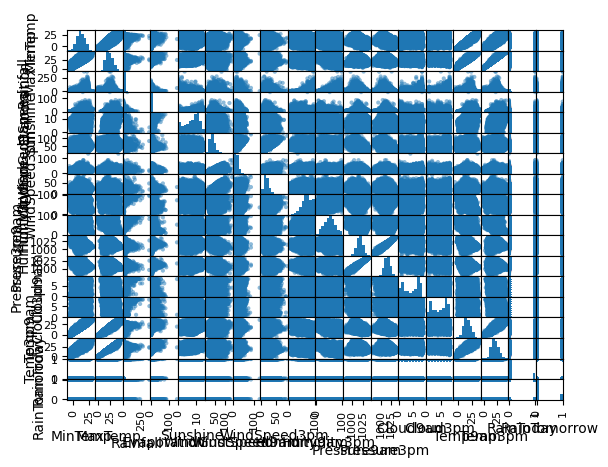

In [8]:
from pandas.plotting import scatter_matrix
scatter_matrix(rain_df)
plt.show() #plot is then shown using plt.show().

### 3) VISUALIZATION OF DATASET

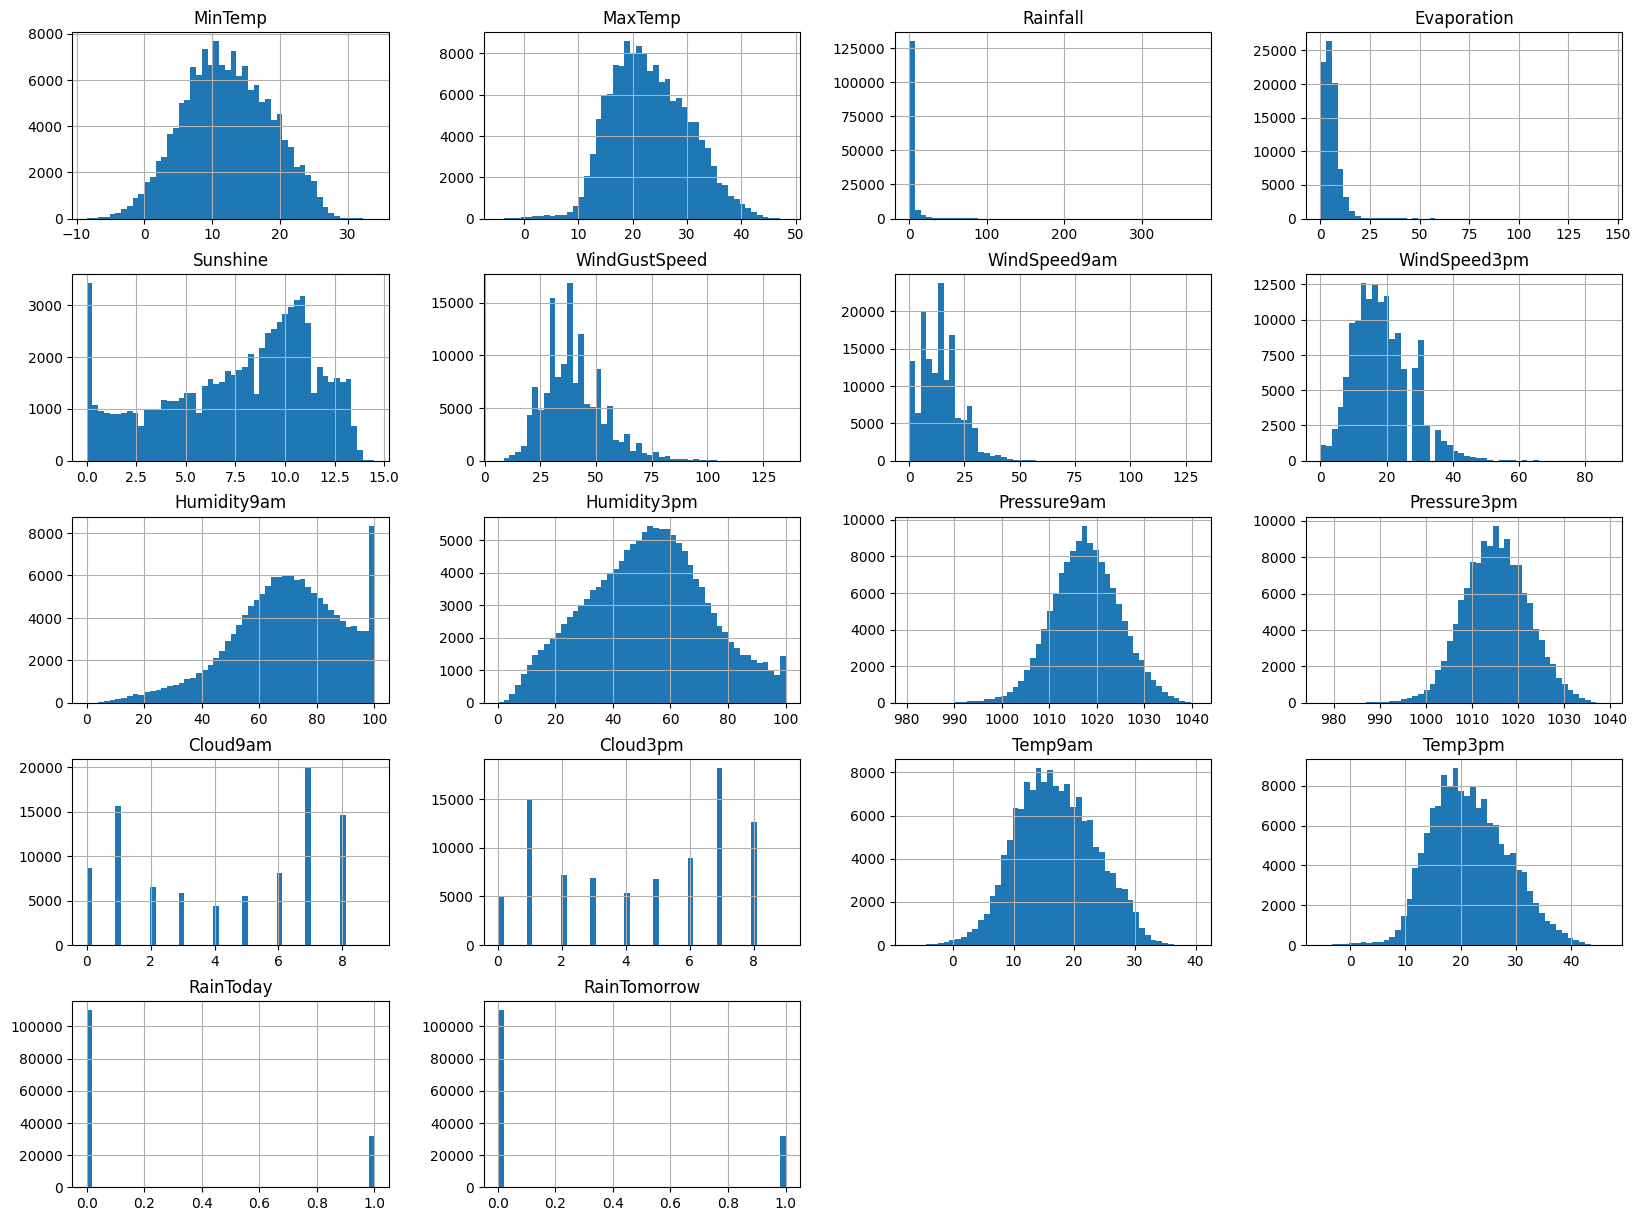

In [9]:
#Histogram of each attribute in rain_df.
import matplotlib.pyplot as plt
rain_df.hist(bins=50, figsize=(20, 15))
plt.show()

According to those histograms, we can see attributes: Humidity3pm, Pressure9am, Pressure3pm, MaxTemp, MinTemp, Temp9am, and Temp3pm.
Also, there are some categorical features such as: RainToday, RainTomorrow, Cloud9am, Cloud3pm.

From the histogram plot, we can observe that the majority of the attributes in the dataset are normally distributed. A few attributes, such as Rainfall, Evaporation, and Sunshine, appear to have a skewed distribution. The Rainfall attribute shows the highest frequency of values between 0 and 50, with a long tail indicating some extremely high rainfall values. The attributes MinTemp and MaxTemp are symmetrically distributed around their mean values, indicating that temperatures are fairly evenly distributed throughout the year. The WindGustSpeed attribute appears to have a bimodal distribution with peaks around 35 and 50 km/h. The Humidity9am and Humidity3pm attributes are fairly normally distributed, with the majority of values centered around 70% and 50%, respectively. The Pressure9am and Pressure3pm attributes appear to be normally distributed with the mean around 1017 hpa, and Cloud9am and Cloud3pm attributes show a normal distribution centered around 5/8. Overall, the histogram plot provides us with valuable insights about the distribution of attributes in the dataset, which can help us in further analyzing the data and building a predictive model.

## II) DATA CLEANING AND TRANSFORMATION

### 1) DEALING WITH MISSING VALUES

We will divide dataset into 2 parts (Categorical and Numerical)

### *Dealing with Categorical Missing Values*

In [10]:
# Get list of categorical variables
s = (rain_df.dtypes == "object") 
object_cols = list(s[s].index) 
print("Categorical variables:") # Print the list of column names with categorical variables
print(object_cols)

Categorical variables:
['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']


In [11]:
for i in object_cols:
    print(i, rain_df[i].isnull().sum())

Date 0
Location 0
WindGustDir 10326
WindDir9am 10566
WindDir3pm 4228


As can be seen, WindGustDir, WindDir9am, WindDir3pm have many missing values.

* In this dataset, I will replace the missing values with the mode of the column values.

* Because the mode is the most frequently occurring value in a column, and using it as a replacement for missing values can help to maintain the overall distribution and characteristics of the original data.

In [12]:
# Filling missing values with mode of the column in value

for i in object_cols:
    rain_df[i].fillna(rain_df[i].mode()[0], inplace=True)

### *Dealing with Numerical Missing Values*
* Filling missing values with median of the column value
* The reason we filled with median values is: the median is used for numerical data because it is not affected by extreme values and provides a robust measure of central tendency

In [13]:
# Get list of neumeric variables
t = (rain_df.dtypes == "float64")
num_cols = list(t[t].index)

print("Neumeric variables:")
print(num_cols)

Neumeric variables:
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']


In [14]:
# Missing values in numeric variables

for i in num_cols:
    print(i, rain_df[i].isnull().sum())

MinTemp 1485
MaxTemp 1261
Rainfall 3261
Evaporation 62790
Sunshine 69835
WindGustSpeed 10263
WindSpeed9am 1767
WindSpeed3pm 3062
Humidity9am 2654
Humidity3pm 4507
Pressure9am 15065
Pressure3pm 15028
Cloud9am 55888
Cloud3pm 59358
Temp9am 1767
Temp3pm 3609
RainToday 3261
RainTomorrow 3267


In [15]:
# Filling missing values with median of the column in value

for i in num_cols:
    rain_df[i].fillna(rain_df[i].median(), inplace=True)
rain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        145460 non-null  float64
 3   MaxTemp        145460 non-null  float64
 4   Rainfall       145460 non-null  float64
 5   Evaporation    145460 non-null  float64
 6   Sunshine       145460 non-null  float64
 7   WindGustDir    145460 non-null  object 
 8   WindGustSpeed  145460 non-null  float64
 9   WindDir9am     145460 non-null  object 
 10  WindDir3pm     145460 non-null  object 
 11  WindSpeed9am   145460 non-null  float64
 12  WindSpeed3pm   145460 non-null  float64
 13  Humidity9am    145460 non-null  float64
 14  Humidity3pm    145460 non-null  float64
 15  Pressure9am    145460 non-null  float64
 16  Pressure3pm    145460 non-null  float64
 17  Cloud9am       145460 non-nul

### 2)Label encoding the catagorical variable
* Definition: Categorical variables are converted into numerical labels.
* The purpose: To convert categorical variables into a format that can be easily understood and processed by machine learning algorithms or statistical models, which typically require numerical inputs.
* In this dataframe, there are 5 categorical variable: Location, Data, WindGustDir, WindDir9am, WindDir3pm

In [16]:
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder from sklearn.preprocessing module

label_encoder = LabelEncoder() # Create an instance of LabelEncoder

for i in object_cols:
    rain_df[i] = label_encoder.fit_transform(rain_df[i])
    
rain_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  int64  
 1   Location       145460 non-null  int64  
 2   MinTemp        145460 non-null  float64
 3   MaxTemp        145460 non-null  float64
 4   Rainfall       145460 non-null  float64
 5   Evaporation    145460 non-null  float64
 6   Sunshine       145460 non-null  float64
 7   WindGustDir    145460 non-null  int64  
 8   WindGustSpeed  145460 non-null  float64
 9   WindDir9am     145460 non-null  int64  
 10  WindDir3pm     145460 non-null  int64  
 11  WindSpeed9am   145460 non-null  float64
 12  WindSpeed3pm   145460 non-null  float64
 13  Humidity9am    145460 non-null  float64
 14  Humidity3pm    145460 non-null  float64
 15  Pressure9am    145460 non-null  float64
 16  Pressure3pm    145460 non-null  float64
 17  Cloud9am       145460 non-nul

### 3) Feature Scaling

Reason for feature scaling before detecting outliers: 
* Ensures that all features contribute equally to the outlier detection process

In [17]:
from sklearn import preprocessing

features = rain_df.drop(['RainTomorrow', 'Date'], axis=1)

target = rain_df['RainTomorrow'] # Assign the 'RainTomorrow' column to the target variable

# Set up a standard scaler for the features
col_names = list(features.columns)
s_scaler = preprocessing.StandardScaler()

features = s_scaler.fit_transform(features)

features = pd.DataFrame(features, columns=col_names)

features.describe().T

count          mean       std       min       25%       50%  \
Location       145460.0  7.815677e-18  1.000003 -1.672228 -0.899139  0.014511   
MinTemp        145460.0 -4.501830e-16  1.000003 -3.250525 -0.705659 -0.030170   
MaxTemp        145460.0  3.001220e-16  1.000003 -3.952405 -0.735852 -0.086898   
Rainfall       145460.0  7.815677e-18  1.000003 -0.275097 -0.275097 -0.275097   
Evaporation    145460.0 -3.282584e-17  1.000003 -1.629472 -0.371139 -0.119472   
Sunshine       145460.0 -5.424080e-16  1.000003 -2.897217  0.076188  0.148710   
WindGustDir    145460.0  6.252542e-18  1.000003 -1.724209 -0.872075  0.193094   
WindGustSpeed  145460.0  1.824961e-16  1.000003 -2.588407 -0.683048 -0.073333   
WindDir9am     145460.0  7.190423e-17  1.000003 -1.550000 -0.885669  0.000105   
WindDir3pm     145460.0  8.284618e-17  1.000003 -1.718521 -0.837098  0.044324   
WindSpeed9am   145460.0  5.627287e-17  1.000003 -1.583291 -0.793380 -0.116314   
WindSpeed3pm   145460.0  6.565169e-17  1.000003 -2.141841 -0.650449  0.037886   
Humidity9am    145460.0  2.250915e-16  1.000003 -3.654212 -0.631189  0.058273   
Humidity3pm    145460.0 -8.440931e-17  1.000003 -2.518329 -0.710918  0.021816   
Pressure9am    145460.0 -4.314254e-16  1.000003 -5.520544 -0.616005 -0.006653   
Pressure3pm    145460.0  5.027043e-15  1.000003 -5.724832 -0.622769 -0.007520   
Cloud9am       145460.0 -1.016038e-16  1.000003 -2.042425 -0.727490  0.149133   
Cloud3pm       145460.0  7.346736e-17  1.000003 -2.235619 -0.336969  0.137693   
Temp9am        145460.0  7.503050e-17  1.000003 -3.750358 -0.726764 -0.044517   
Temp3pm        145460.0 -6.877796e-17  1.000003 -3.951301 -0.725322 -0.083046   
RainToday      145460.0 -8.988029e-18  1.000003 -0.529795 -0.529795 -0.529795   

                    75%        max  
Location       0.857881   1.701250  
MinTemp        0.723865   3.410112  
MaxTemp        0.703133   3.510563  
Rainfall      -0.203581  43.945571  
Evaporation    0.006361  43.985108  
Sunshine       0.257494   2.360634  
WindGustDir    1.045228   1.471296  
WindGustSpeed  0.460168   7.243246  
WindDir9am     0.885879   1.771653  
WindDir3pm     0.925747   1.586813  
WindSpeed9am   0.560752  13.086472  
WindSpeed3pm   0.611499   7.839016  
Humidity9am    0.747734   1.649338  
Humidity3pm    0.656852   2.366565  
Pressure9am    0.617561   3.471111  
Pressure3pm    0.622735   3.653960  
Cloud9am       0.587445   1.902380  
Cloud3pm       0.612356   2.036343  
Temp9am        0.699753   3.599302  
Temp3pm        0.661411   3.653834  
RainToday     -0.529795   1.887521

## 4) Detecting And Dropping Outliers

*Outliers Visualization*

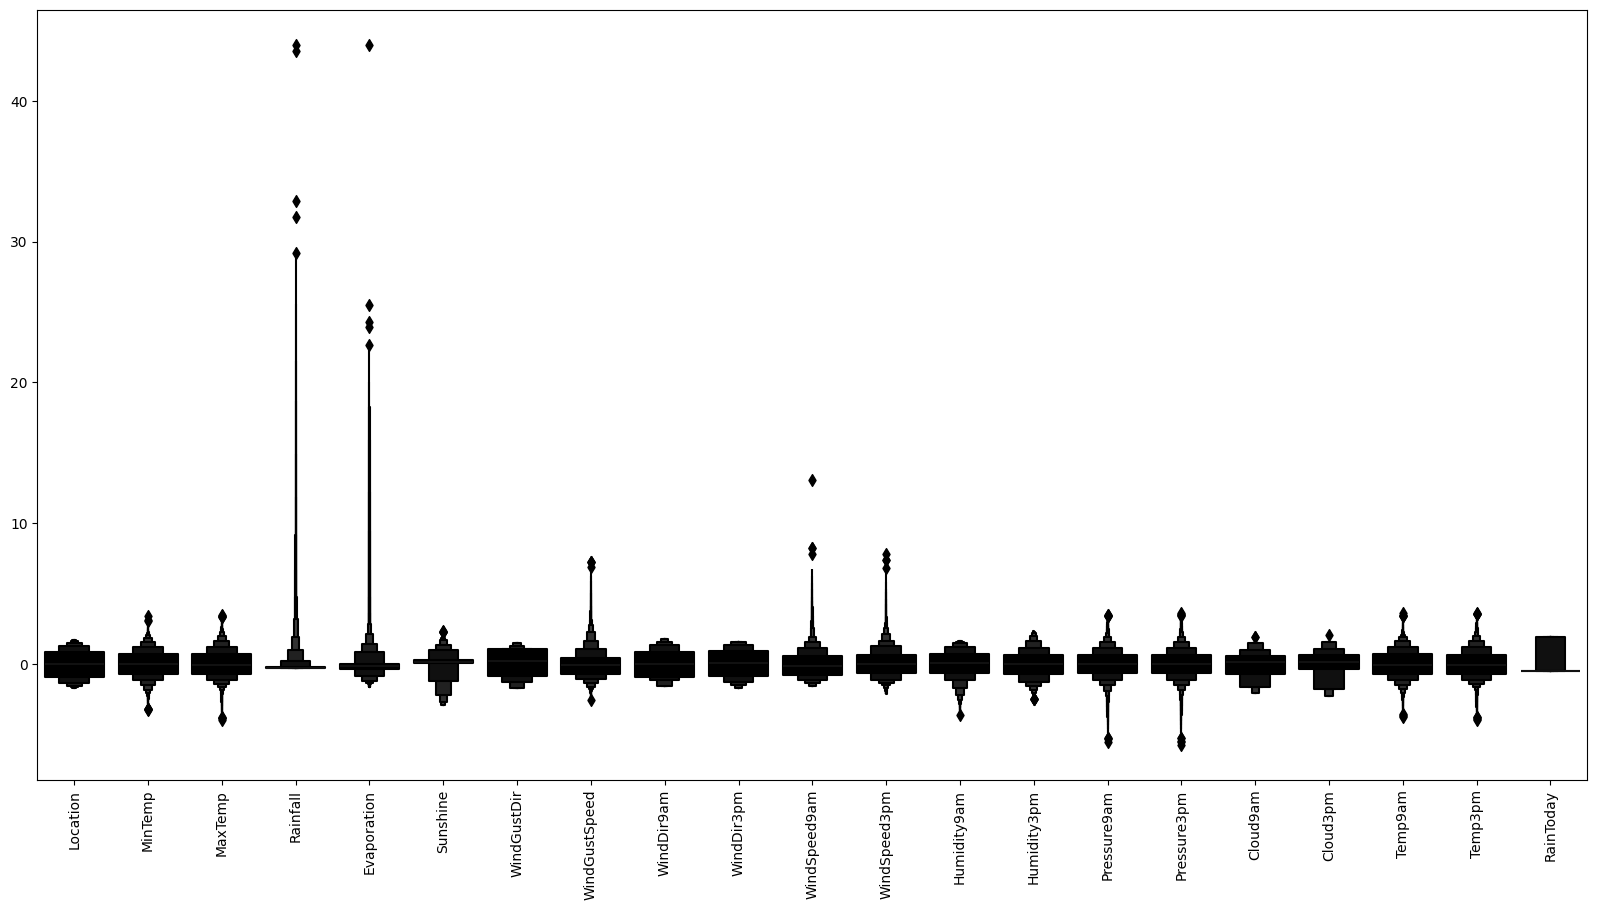

In [18]:
colours = ["#000000"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = features,palette = colours)
plt.xticks(rotation=90)
plt.show()

*Drop the outliers*

##### How to calculate the outliers:

* Calculate the IQR of the dataset: IQR = Q3 (third quartile) - Q1 (first quartile)

* Define the lower bound for outliers: Q1 - (1.5 * IQR)

* Define the upper bound for outliers: Q3 + (1.5 * IQR)


In [19]:

#adds the target variable "RainTomorrow" back to the features dataframe.

features["RainTomorrow"] = target


features = features[(features["MinTemp"]<2.3)&(features["MinTemp"]>-2.3)]
features = features[(features["MaxTemp"]<2.3)&(features["MaxTemp"]>-2)]
features = features[(features["Rainfall"]<4.5)]
features = features[(features["Evaporation"]<2.8)]
features = features[(features["Sunshine"]<2.1)]
features = features[(features["WindGustSpeed"]<4)&(features["WindGustSpeed"]>-4)]
features = features[(features["WindSpeed9am"]<4)]
features = features[(features["WindSpeed3pm"]<2.5)]
features = features[(features["Humidity9am"]>-3)]
features = features[(features["Humidity3pm"]>-2.2)]
features = features[(features["Pressure9am"]< 2)&(features["Pressure9am"]>-2.7)]
features = features[(features["Pressure3pm"]< 2)&(features["Pressure3pm"]>-2.7)]
features = features[(features["Cloud9am"]<1.8)]
features = features[(features["Cloud3pm"]<2)]
features = features[(features["Temp9am"]<2.3)&(features["Temp9am"]>-2)]
features = features[(features["Temp3pm"]<2.3)&(features["Temp3pm"]>-2)]


features.shape

(127536, 22)

In [20]:
rain_df = features #set features dataframe to rain_df(original dataframe)

In [21]:
rain_df

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
0      -1.531666  0.189757 -0.044575 -0.203581    -0.119472   0.14871   
1      -1.531666 -0.752786  0.265794 -0.275097    -0.119472   0.14871   
2      -1.531666  0.111212  0.350440 -0.275097    -0.119472   0.14871   
3      -1.531666 -0.470023  0.674917 -0.275097    -0.119472   0.14871   
4      -1.531666  0.833828  1.281548 -0.155903    -0.119472   0.14871   
...          ...       ...       ...       ...          ...       ...   
145455  1.209285 -1.475402  0.025964 -0.275097    -0.119472   0.14871   
145456  1.209285 -1.349730  0.294010 -0.275097    -0.119472   0.14871   
145457  1.209285 -1.066967  0.519733 -0.275097    -0.119472   0.14871   
145458  1.209285 -0.689950  0.533840 -0.275097    -0.119472   0.14871   
145459  1.209285  0.425393 -0.086898 -0.275097    -0.119472   0.14871   

        WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  Humidity9am  \
0          1.045228       0.307739    1.328766    1.366458  ...     0.111308   
1          1.258262       0.307739   -0.221338    1.586813  ...    -1.320650   
2          1.471296       0.460168    1.328766    1.586813  ...    -1.638863   
3         -0.872075      -1.216548    0.442992   -1.718521  ...    -1.267615   
4          1.045228       0.079096   -1.328556   -0.176032  ...     0.694699   
...             ...            ...         ...         ...  ...          ...   
145455    -1.724209      -0.683048    0.442992   -1.498165  ...    -0.949402   
145456    -0.446007      -1.368977    0.442992   -1.057454  ...    -0.684224   
145457    -1.085108      -0.225761    0.442992    1.366458  ...    -0.843331   
145458     0.193094      -0.911691    0.664436   -1.057454  ...    -0.949402   
145459     1.045228      -0.073333   -1.107113   -1.277810  ...    -0.366011   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm   Temp9am  \
0         -1.443652    -1.478015    -1.223012  1.464068  0.137693 -0.013506   
1         -1.297105    -1.047010    -1.117969  0.149133  0.137693  0.033011   
2         -1.052860    -1.492877    -0.982915  0.149133 -1.286294  0.622225   
3         -1.736746    -0.006653    -0.367666  0.149133  0.137693  0.172562   
4         -0.906314    -1.017286    -1.388078  1.025756  1.561680  0.126045   
...             ...          ...          ...       ...       ...       ...   
145455    -1.345954     1.033703     0.757789  0.149133  0.137693 -1.067887   
145456    -1.492501     0.870219     0.577716  0.149133  0.137693 -0.943842   
145457    -1.345954     0.498663     0.232577  0.149133  0.137693 -0.695753   
145458    -1.345954     0.260867     0.187559 -0.727490 -1.286294 -0.292607   
145459    -0.759767     0.379765     0.397644  1.464068  1.561680 -0.308112   

         Temp3pm  RainToday  RainTomorrow  
0       0.019135  -0.529795           0.0  
1       0.384064  -0.529795           0.0  
2       0.223495  -0.529795           0.0  
3       0.705202  -0.529795           0.0  
4       1.172312  -0.529795           0.0  
...          ...        ...           ...  
145455  0.106718  -0.529795           0.0  
145456  0.413259  -0.529795           0.0  
145457  0.646814  -0.529795           0.0  
145458  0.632217  -0.529795           0.0  
145459 -0.112240  -0.529795           0.0  

[127536 rows x 22 columns]

As the result, there are only 127536 attribute vectors left, there are 17924 datapoints that do not meet standards, are classified as extreme outliers and removed from the  dataset (12.3% reduction)

*Create new index*

In order to avoid miss-indexing, we have to reset index of new dataset

In [22]:
#Create an index array
index=pd.Index([i for i in range(127536)])
rain_df.index=index

In [23]:
#Check the dataset reset 
rain_df.shape

(127536, 22)

# **III) EXPLORATORY DATA ANALYSIS AFTER CLEANING DATA**

## 1) Basic info

In [24]:
rain_df.shape

(127536, 22)

In [25]:
rain_df.head()

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0 -1.531666  0.189757 -0.044575 -0.203581    -0.119472   0.14871     1.045228   
1 -1.531666 -0.752786  0.265794 -0.275097    -0.119472   0.14871     1.258262   
2 -1.531666  0.111212  0.350440 -0.275097    -0.119472   0.14871     1.471296   
3 -1.531666 -0.470023  0.674917 -0.275097    -0.119472   0.14871    -0.872075   
4 -1.531666  0.833828  1.281548 -0.155903    -0.119472   0.14871     1.045228   

   WindGustSpeed  WindDir9am  WindDir3pm  ...  Humidity9am  Humidity3pm  \
0       0.307739    1.328766    1.366458  ...     0.111308    -1.443652   
1       0.307739   -0.221338    1.586813  ...    -1.320650    -1.297105   
2       0.460168    1.328766    1.586813  ...    -1.638863    -1.052860   
3      -1.216548    0.442992   -1.718521  ...    -1.267615    -1.736746   
4       0.079096   -1.328556   -0.176032  ...     0.694699    -0.906314   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  \
0    -1.478015    -1.223012  1.464068  0.137693 -0.013506  0.019135   
1    -1.047010    -1.117969  0.149133  0.137693  0.033011  0.384064   
2    -1.492877    -0.982915  0.149133 -1.286294  0.622225  0.223495   
3    -0.006653    -0.367666  0.149133  0.137693  0.172562  0.705202   
4    -1.017286    -1.388078  1.025756  1.561680  0.126045  1.172312   

   RainToday  RainTomorrow  
0  -0.529795           0.0  
1  -0.529795           0.0  
2  -0.529795           0.0  
3  -0.529795           0.0  
4  -0.529795           0.0  

[5 rows x 22 columns]

In [26]:
col_names = rain_df.columns

col_names

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [27]:
rain_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127536 entries, 0 to 127535
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       127536 non-null  float64
 1   MinTemp        127536 non-null  float64
 2   MaxTemp        127536 non-null  float64
 3   Rainfall       127536 non-null  float64
 4   Evaporation    127536 non-null  float64
 5   Sunshine       127536 non-null  float64
 6   WindGustDir    127536 non-null  float64
 7   WindGustSpeed  127536 non-null  float64
 8   WindDir9am     127536 non-null  float64
 9   WindDir3pm     127536 non-null  float64
 10  WindSpeed9am   127536 non-null  float64
 11  WindSpeed3pm   127536 non-null  float64
 12  Humidity9am    127536 non-null  float64
 13  Humidity3pm    127536 non-null  float64
 14  Pressure9am    127536 non-null  float64
 15  Pressure3pm    127536 non-null  float64
 16  Cloud9am       127536 non-null  float64
 17  Cloud3pm       127536 non-nul

In [28]:
rain_df.describe()

Location        MinTemp        MaxTemp       Rainfall  \
count  127536.000000  127536.000000  127536.000000  127536.000000   
mean        0.001978       0.025710       0.014992      -0.066608   
std         0.996013       0.929286       0.891846       0.578187   
min        -1.672228      -2.292273      -1.991436      -0.275097   
25%        -0.899139      -0.658532      -0.665313      -0.275097   
50%         0.014511      -0.030170      -0.058683      -0.275097   
75%         0.857881       0.692446       0.674917      -0.203581   
max         1.701250       2.294769       2.297301       4.492630   

         Evaporation       Sunshine    WindGustDir  WindGustSpeed  \
count  127536.000000  127536.000000  127536.000000  127536.000000   
mean       -0.076740       0.001478      -0.000482      -0.062498   
std         0.705357       0.994395       1.001698       0.892263   
min        -1.629472      -2.897217      -1.724209      -2.512192   
25%        -0.371139       0.076188      -0.872075      -0.683048   
50%        -0.119472       0.148710       0.193094      -0.073333   
75%         0.006361       0.293755       1.045228       0.460168   
max         2.774694       2.070546       1.471296       3.889814   

          WindDir9am     WindDir3pm  ...    Humidity9am    Humidity3pm  \
count  127536.000000  127536.000000  ...  127536.000000  127536.000000   
mean        0.008537      -0.011114  ...       0.015093       0.007593   
std         1.000067       1.001079  ...       0.932298       0.955944   
min        -1.550000      -1.718521  ...      -2.964751      -2.176386   
25%        -0.885669      -0.837098  ...      -0.578153      -0.662069   
50%         0.000105       0.044324  ...       0.058273       0.021816   
75%         0.885879       0.925747  ...       0.694699       0.656852   
max         1.771653       1.586813  ...       1.649338       2.366565   

         Pressure9am    Pressure3pm       Cloud9am       Cloud3pm  \
count  127536.000000  127536.000000  127536.000000  127536.000000   
mean       -0.005430      -0.005679       0.003607      -0.003232   
std         0.863902       0.864528       0.994720       0.998393   
min        -2.696719      -2.693606      -2.042425      -2.235619   
25%        -0.556556      -0.562745      -0.727490      -0.336969   
50%        -0.006653      -0.007520       0.149133       0.137693   
75%         0.572974       0.577716       0.587445       0.612356   
max         1.999749       1.988287       1.464068       1.561680   

             Temp9am        Temp3pm      RainToday   RainTomorrow  
count  127536.000000  127536.000000  127536.000000  127536.000000  
mean        0.022508       0.015485      -0.012484       0.214677  
std         0.900188       0.893503       0.991414       0.410599  
min        -1.998224      -1.995277      -0.529795       0.000000  
25%        -0.664741      -0.652336      -0.529795       0.000000  
50%        -0.044517      -0.083046      -0.529795       0.000000  
75%         0.668741       0.646814      -0.529795       0.000000  
max         2.296831       2.296296       1.887521       1.000000  

[8 rows x 22 columns]

*Univariate Variable Exploration*
* Explore target variable "RainTomorrow". 

 ##### Check for missing values

In [29]:
rain_df['RainTomorrow'].isnull().sum()

0

We can see that there are no missing values in the RainTomorrow target variable.

##### View number of unique values

In [30]:
rain_df['RainTomorrow'].nunique()

2

We can see that the number of unique values in RainTomorrow variable is 2.

##### View the unique values

In [31]:
rain_df['RainTomorrow'].unique() 
# 0: No , 1: Yes

array([0., 1.])

The two unique values are No and Yes.

##### View the frequency distribution of values¶

In [32]:
rain_df['RainTomorrow'].value_counts()

0.0    100157
1.0     27379
Name: RainTomorrow, dtype: int64

##### View percentage of frequency distribution of values

In [33]:
rain_df['RainTomorrow'].value_counts()/len(rain_df)

0.0    0.785323
1.0    0.214677
Name: RainTomorrow, dtype: float64

We can see that out of the total number of RainTomorrow values, No appears 78.53% times and Yes appears 21.46% times.

##### Visualize frequency distribution of RainTomorrow variable

In [34]:

#Visualizes the count of the target variable "RainTomorrow" using a seaborn countplot with a color palette of "Set1".

f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="RainTomorrow", data=rain_df, palette="Set1")
plt.show()

Interpretation
The above univariate plot confirms our findings that -

* The No variable have 110316 entries, and

* The Yes variable have 31877 entries.

We can plot the bars horizontally as follows :

In [35]:
f, ax = plt.subplots(figsize=(8, 4))
ax = sns.countplot(y="RainTomorrow", data=rain_df, palette="Set1")
plt.show()

**Findings of Univariate Analysis**

* The number of unique values in RainTomorrow variable is 2.

* The two unique values are No and Yes.

* Out of the total number of RainTomorrow values, No appears 77.58% times and Yes appears 22.42% times.

* The univariate plot confirms our findings that –

  * The No variable have 110316 entries, and

  * The Yes variable have 31877 entries.

*Explore Location variable*

In [36]:
# print number of labels in Location variable

print('Location contains', len(rain_df.Location.unique()), 'labels')

Location contains 49 labels


As can be seen, there are 49 labels according to each city in Australia that has been encoded into number. 

In [37]:
# check labels in location variable
rain_df.Location.unique()

array([-1.53166617, -1.39110458, -0.96941982, -0.89913902, -0.19633108,
        0.0145113 ,  0.15507289,  0.22535368,  0.43619606,  0.71731924,
        0.92816162,  0.99844241,  1.27956559,  1.49040797,  1.63096955,
       -1.03970061,  1.139004  , -0.0557695 , -1.32082378, -1.25054299,
        0.78760003, -0.33689267, -0.40717346, -0.26661188,  0.08479209,
        0.64703844,  1.42012717, -0.82885823, -1.1802622 , -1.1099814 ,
       -0.68829664,  1.0687232 , -1.67222775, -0.12605029,  0.29563447,
        1.70125035, -1.60194696,  1.56068876,  0.36591527,  0.57675765,
        0.50647685,  0.85788082,  1.34984638, -0.61801585, -0.47745426,
       -1.46138537, -0.75857743, -0.54773505,  1.20928479])

In [38]:
# check frequency distribution of values in Location variable
rain_df.Location.value_counts()

-1.180262    3108
 0.928162    3099
 0.506477    3011
 0.436196    2934
-0.758577    2918
 0.014511    2901
 0.225354    2901
 0.857881    2898
 1.068723    2866
 1.560689    2849
-1.109981    2838
 1.349846    2838
-1.039701    2795
 0.576758    2795
-1.391105    2791
 0.365915    2787
-0.899139    2768
-1.601947    2762
-0.688297    2756
-1.672228    2751
-0.407173    2748
-1.250543    2716
-1.531666    2697
 0.155073    2696
-0.196331    2681
-0.126050    2667
 0.717319    2665
 1.420127    2651
-0.828858    2643
 0.295634    2631
 0.647038    2629
-0.969420    2617
-0.618016    2615
 1.630970    2611
 0.998442    2603
-0.477454    2596
-0.266612    2568
 1.490408    2566
 1.279566    2566
 0.787600    2554
-0.336893    2533
 1.139004    2528
-1.320824    2507
-1.461385    2199
 1.701250    2091
-0.055769    1656
 0.084792    1356
-0.547735    1324
 1.209285    1256
Name: Location, dtype: int64

*Explore WindGustDir variable*

In [39]:
# print number of labels in WindGustDir variable

print('WindGustDir contains', len(rain_df['WindGustDir'].unique()), 'labels')

WindGustDir contains 16 labels


In [40]:
# check labels in WindGustDir variable

rain_df['WindGustDir'].unique()

array([ 1.04522847,  1.25826214,  1.47129581, -0.87207454, -0.44600721,
       -1.08510821, -0.65904087,  0.8321948 , -1.51117555,  0.40612747,
       -0.01993987,  0.1930938 , -1.72420922, -0.23297354,  0.61916114,
       -1.29814188])

As can be seen, there are 16 different values for this variable

In [41]:
# check frequency distribution of values in WindGustDir variable

rain_df.WindGustDir.value_counts()

 1.045228    18014
 0.193094     8358
-1.724209     8121
 0.406127     8089
 0.832195     8027
 1.471296     7926
-0.019940     7919
-1.085108     7840
 0.619161     7730
-1.511176     7282
 1.258262     6982
-0.232974     6798
-1.298142     6497
-0.872075     6464
-0.659041     5873
-0.446007     5616
Name: WindGustDir, dtype: int64

*Explore WindDir9am variable*

In [42]:
# print number of labels in WindDir9am variable

print('WindDir9am contains', len(rain_df['WindDir9am'].unique()), 'labels')

WindDir9am contains 16 labels


In [43]:
# check labels in WindDir9am variable

rain_df['WindDir9am'].unique()

array([ 1.32876628e+00, -2.21338496e-01,  4.42992121e-01, -1.32855619e+00,
        1.10732274e+00,  6.64435661e-01,  2.21548582e-01, -6.64225574e-01,
       -8.85669113e-01,  8.85879200e-01,  1.77165336e+00, -1.10711265e+00,
       -1.54999973e+00,  1.05043340e-04,  1.55020982e+00, -4.42782035e-01])

In [44]:
# check frequency distribution of values in WindDir9am variable

rain_df['WindDir9am'].value_counts()

-0.885669    18827
 0.442992     8426
 0.664436     8217
-1.550000     8058
 0.221549     7725
 0.000105     7584
 1.107323     7572
 1.328766     7391
-0.442782     6990
-1.328556     6907
-0.221338     6866
-1.107113     6809
 0.885879     6804
-0.664226     6748
 1.550210     6399
 1.771653     6213
Name: WindDir9am, dtype: int64

*Explore WindDir3pm variable*

In [45]:
# print number of labels in WindDir3pm variable

print('WindDir3pm contains', len(rain_df['WindDir3pm'].unique()), 'labels')

WindDir3pm contains 16 labels


In [46]:
# check labels in WindDir3pm variable

rain_df['WindDir3pm'].unique()

array([ 1.36645776,  1.58681337, -1.71852077, -0.1760315 ,  1.14610215,
        0.48503533, -1.27780955, -1.49816516,  0.70539094,  0.92574654,
       -0.39638711,  0.26467972, -1.05745394,  0.04432411, -0.61674272,
       -0.83709833])

In [47]:
# check frequency distribution of values in WindDir3pm variable

rain_df['WindDir3pm'].value_counts()

 0.264680    13567
 0.044324     8652
 1.146102     8529
 0.925747     8333
 1.586813     8272
 0.485035     8249
-1.277810     7597
-1.718521     7582
-0.837098     7563
-1.057454     7548
 1.366458     7522
-0.176032     7213
-1.498165     7165
 0.705391     7164
-0.396387     6682
-0.616743     5898
Name: WindDir3pm, dtype: int64

*Explore RainToday variable*

In [48]:
# print number of labels in RainToday variable

print('RainToday contains', len(rain_df['RainToday'].unique()), 'labels')

RainToday contains 2 labels


In [49]:
# check labels in WindGustDir variable

rain_df['RainToday'].unique()

array([-0.52979545,  1.88752093])

In [50]:
# check frequency distribution of values in WindGustDir variable

rain_df.RainToday.value_counts()

-0.529795    100243
 1.887521     27293
Name: RainToday, dtype: int64

correlation = rain_df.corr()

##### Heat map

In [51]:
correlation = rain_df.corr()

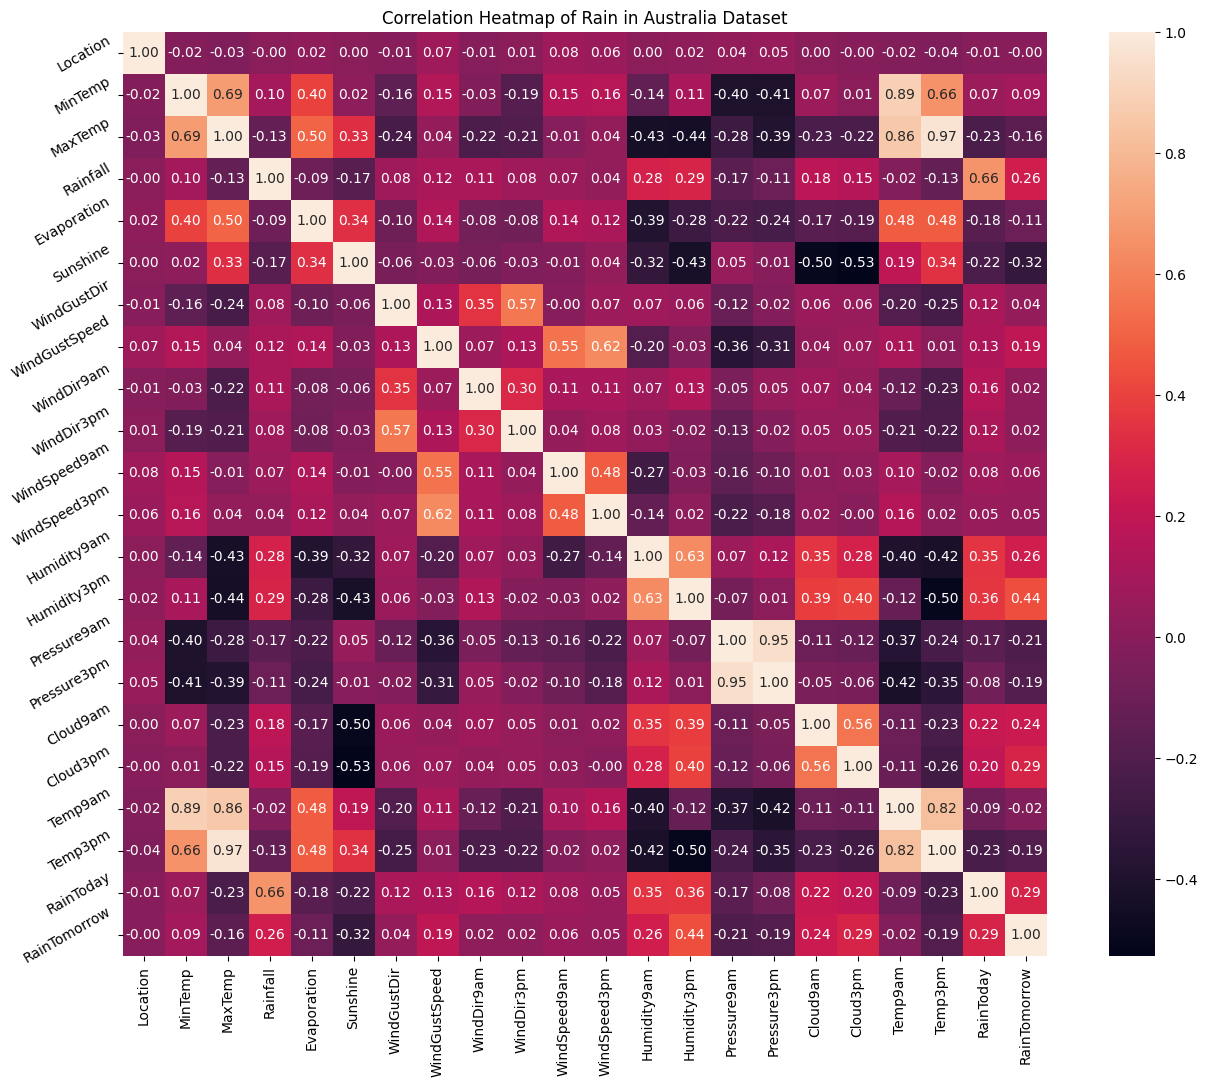

In [52]:
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Rain in Australia Dataset')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

##### From the above correlation heat map, we can conclude that :-

* MinTemp and MaxTemp variables are highly positively correlated (correlation coefficient = 0.69).

* MinTemp and Temp3pm variables are also highly positively correlated (correlation coefficient = 0.66).

* MinTemp and Temp9am variables are strongly positively correlated (correlation coefficient = 0.89).

* MaxTemp and Temp9am variables are strongly positively correlated (correlation coefficient = 0.86).

* MaxTemp and Temp3pm variables are also strongly positively correlated (correlation coefficient = 0.97).

* WindGustSpeed and WindSpeed3pm variables are highly positively correlated (correlation coefficient = 0.62).


In [53]:
num_var = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'WindGustSpeed', 'WindSpeed3pm', 'Pressure9am', 'Pressure3pm']

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has be

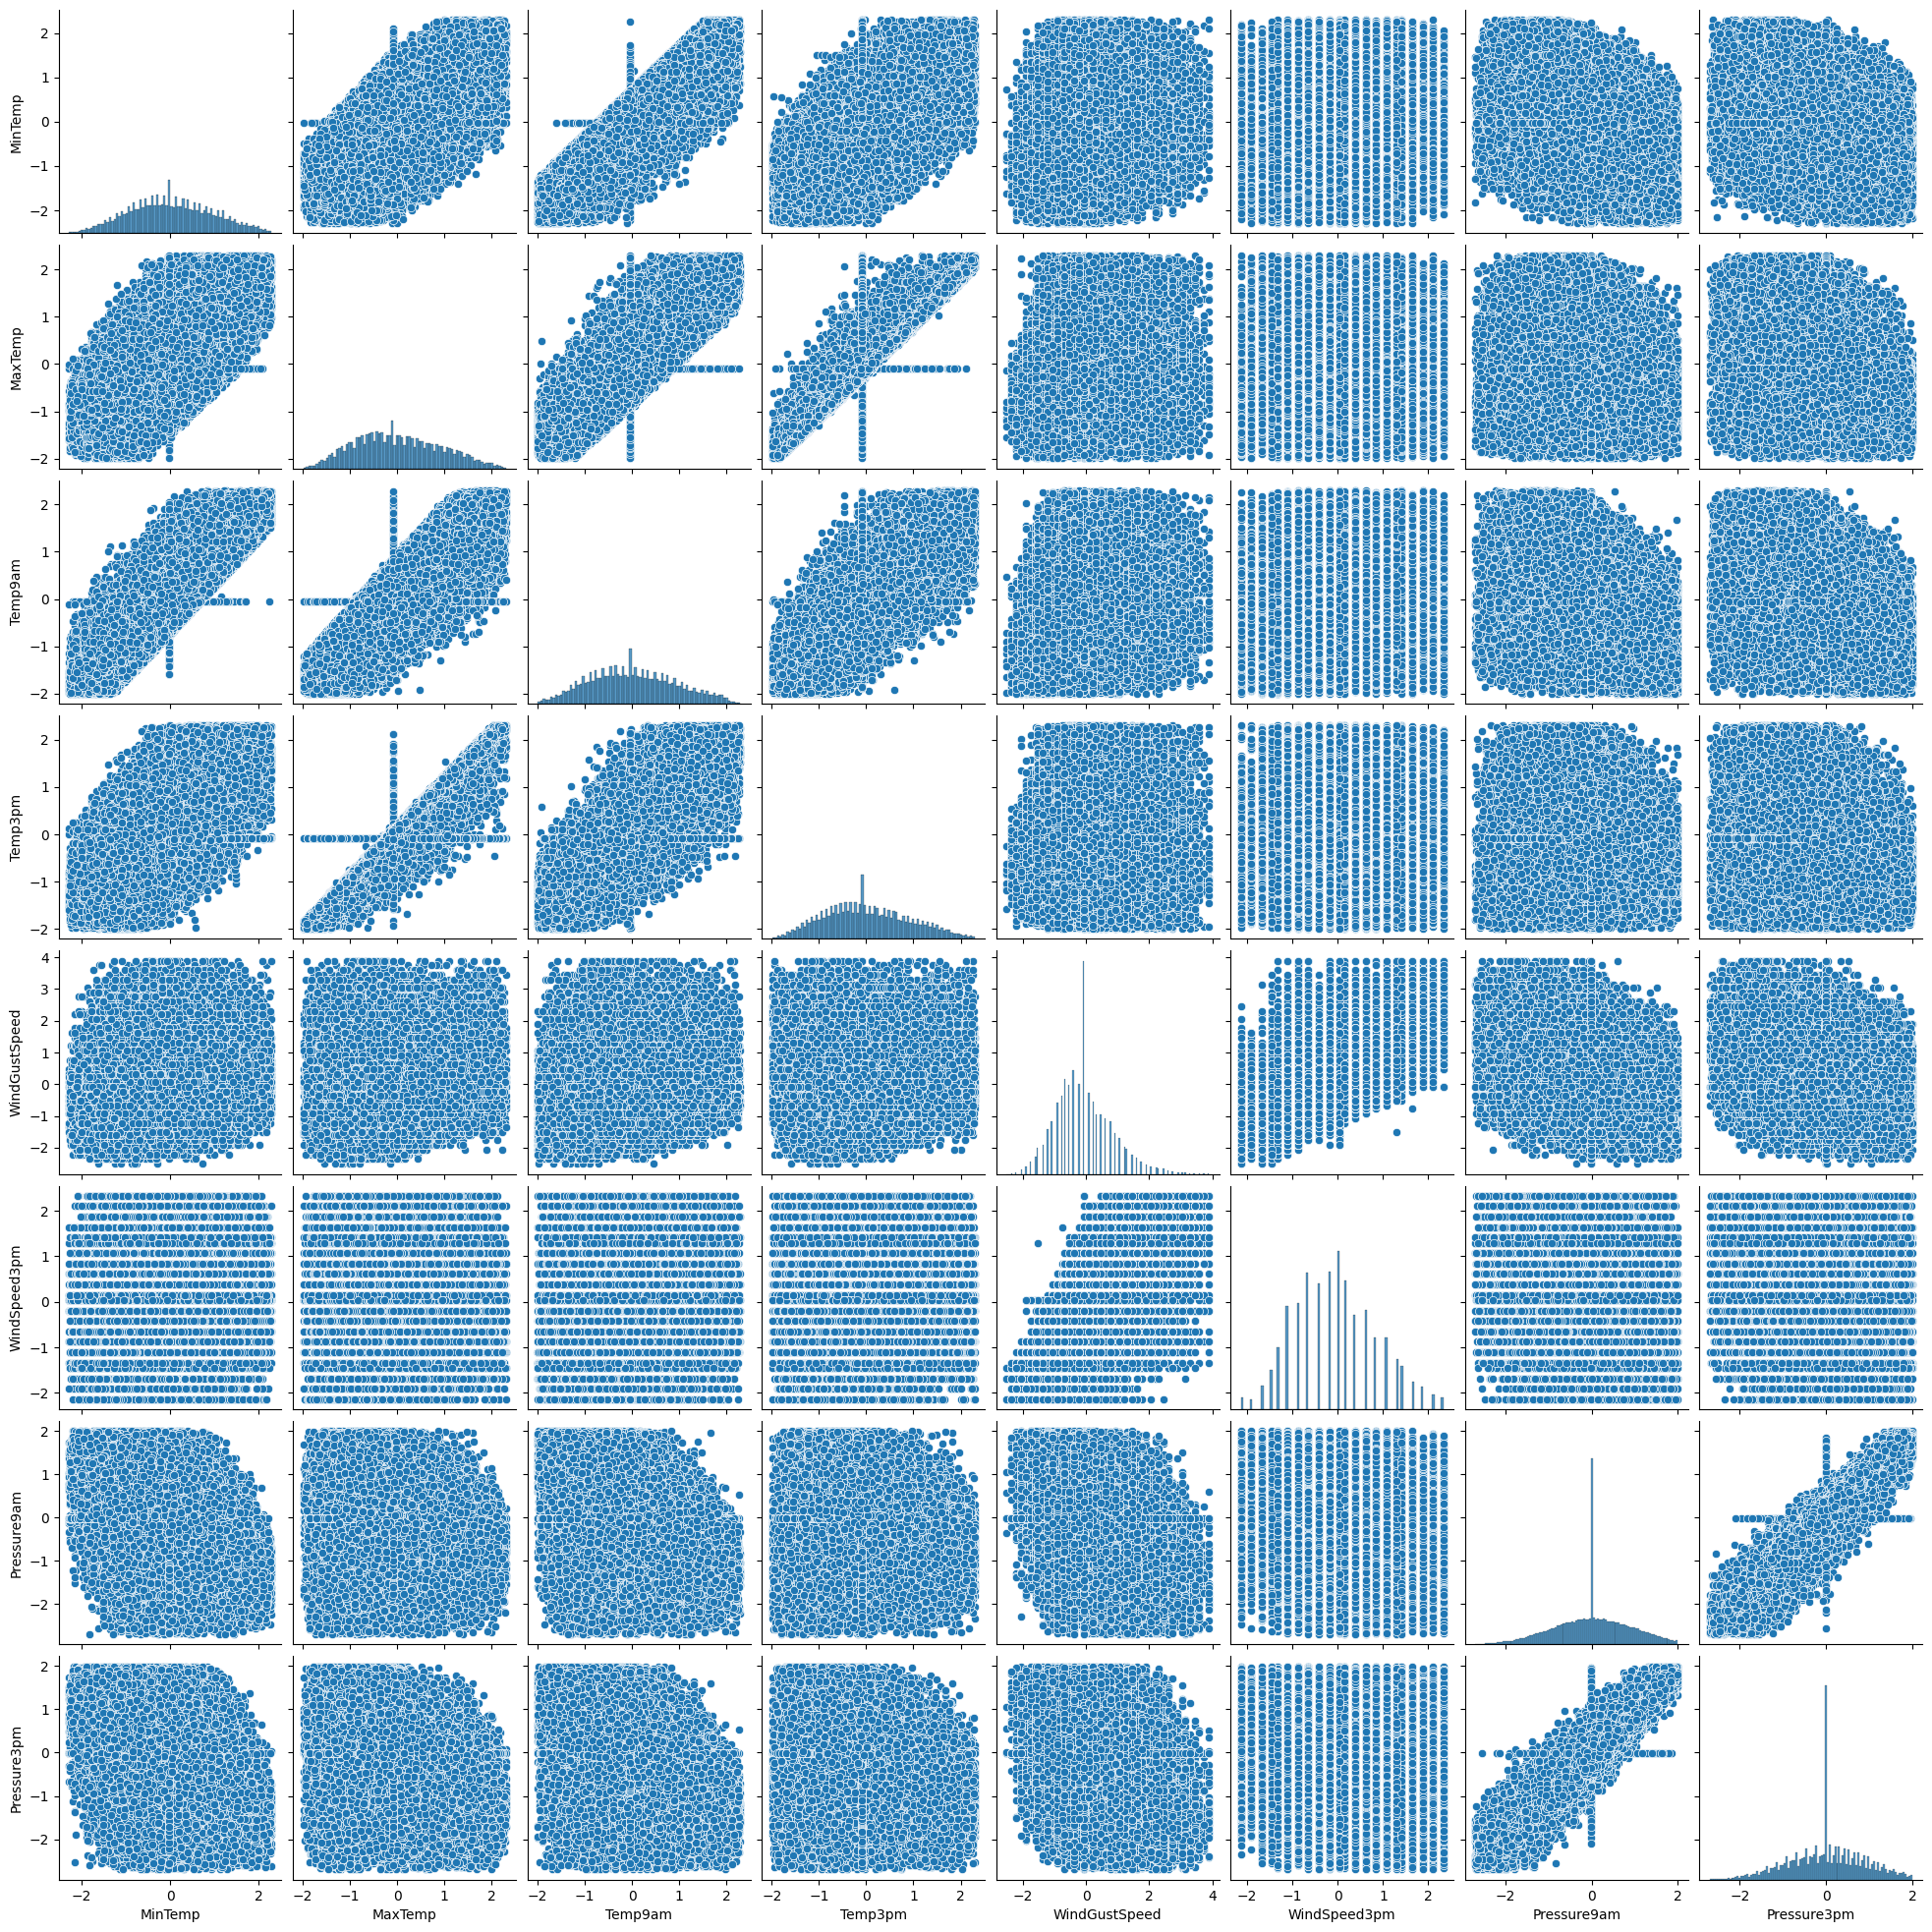

In [54]:
sns.pairplot(rain_df[num_var], kind='scatter', diag_kind='hist', palette='Rainbow')
plt.show()

I have defined a variable num_var which consists of MinTemp, MaxTemp, Temp9am, Temp3pm, WindGustSpeed, WindSpeed3pm, Pressure9am and Pressure3pm variables.

The above pair plot shows relationship between these variables

# III) TESTING MULTIPLE MODELS

- Splitting data into training and testing sets is crucial for evaluating machine learning model performance. The training set is used to train the model while the testing set is used to evaluate the model's performance on new data. This helps avoid overfitting, where the model performs well on training data but poorly on new data. 

- Normalization scales features to a similar range, ensuring no feature dominates others and improving machine learning algorithm performance. 

- fit_transform() calculates the mean and standard deviation of training data, scales it, and applies the same scaling to the test data.


In [55]:
features = rain_df[['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 
                       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 
                       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 
                       'RainToday']]
target = rain_df['RainTomorrow']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=12345) 


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit the StandardScaler to the training data and transform it
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)


- The ROC curve is used in binary classification to evaluate model performance by plotting true positive rate against false positive rate. It is a visual comparison of different models or threshold values. 
- The Matplotlib method legend() adds a legend to the plot, displaying labels of plotted lines or markers.

In [56]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    
    # Plot a diagonal line from (0,0) to (1,1) to represent a random classifier
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    
    # Label the x and y axes
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    # Set the title of the plot
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    
    # Add a legend to the plot
    plt.legend()
    
    # Show the plot
    plt.show()


In [57]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, plot_confusion_matrix, roc_curve, classification_report

def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    # Start timer
    t0 = time.time()
    
    if verbose == False:
        model.fit(X_train, y_train, verbose=0)
    else:
        model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    coh_kap = cohen_kappa_score(y_test, y_pred)
    
    time_taken = time.time() - t0
    
    # Print evaluation metrics
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Cohen's Kappa = {}".format(coh_kap))
    print("Time taken = {}".format(time_taken))
    
    print(classification_report(y_test, y_pred, digits=5))
    
    probs = model.predict_proba(X_test)
    probs = probs[:, 1]
    fper, tper, thresholds = roc_curve(y_test, probs)
    

    plot_roc_cur(fper, tper)
    
    # Plot confusion matrix
    plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues, normalize='all')
    
    return model, accuracy, roc_auc, coh_kap, time_taken



### 1) LOGISTIC REGRESSION

In this case, we want to split the it into to train and test set with ratio 0.75 : 0.25, respectively

Accuracy = 0.8448751725003136
ROC Area under Curve = 0.7062401084813466
Cohen's Kappa = 0.47234196953188023
Time taken = 1.0657122135162354
              precision    recall  f1-score   support

         0.0    0.86648   0.94879   0.90577     25054
         1.0    0.71169   0.46369   0.56152      6830

    accuracy                        0.84488     31884
   macro avg    0.78908   0.70624   0.73365     31884
weighted avg    0.83332   0.84488   0.83203     31884



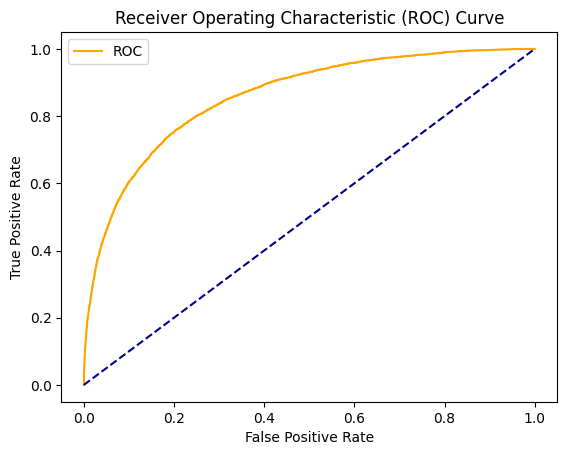

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


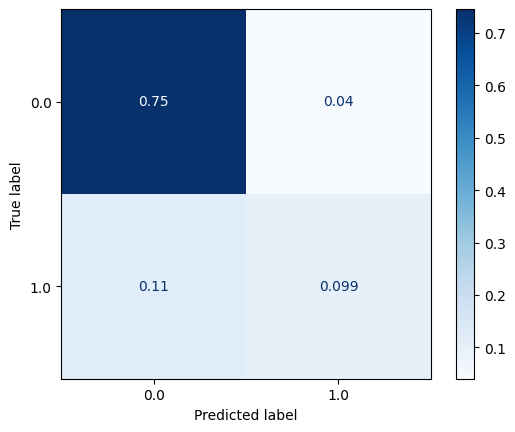

In [58]:
from sklearn.linear_model import LogisticRegression

# Define a dictionary of hyperparameters to be used by the model
params_lr = {'penalty': 'l1', 'solver':'liblinear'}

# Create a new LogisticRegression model object with the specified hyperparameters
model_lr = LogisticRegression(**params_lr)

model_lr, accuracy_lr, roc_auc_lr, coh_kap_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)


### 2) Decision tree

Accuracy = 0.8152678459415381
ROC Area under Curve = 0.6856435662658263
Cohen's Kappa = 0.4035645578759306
Time taken = 0.33628225326538086
              precision    recall  f1-score   support

         0.0    0.86082   0.91243   0.88587     25054
         1.0    0.58821   0.45886   0.51555      6830

    accuracy                        0.81527     31884
   macro avg    0.72452   0.68564   0.70071     31884
weighted avg    0.80243   0.81527   0.80655     31884



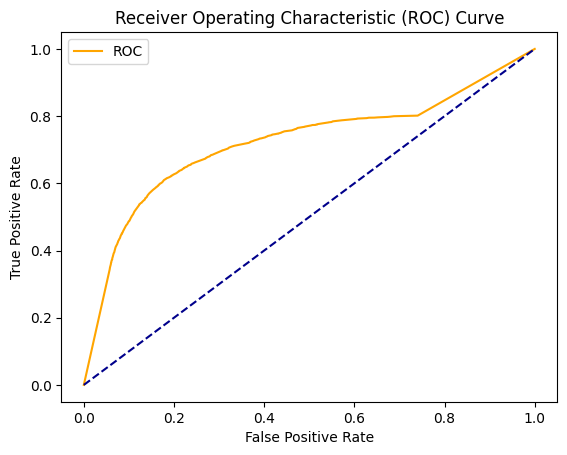

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


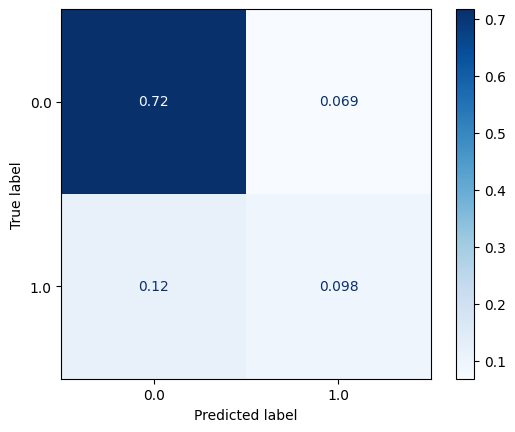

In [59]:
from sklearn.tree import DecisionTreeClassifier


params_dt = {'max_depth': 16,  # Maximum depth of the decision tree
             'max_features': "sqrt"}  
model_dt = DecisionTreeClassifier(**params_dt)

model_dt, accuracy_dt, roc_auc_dt, coh_kap_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)


### 3) Gaussian NB

Accuracy = 0.7992096349266089
ROC Area under Curve = 0.7340533905037447
Cohen's Kappa = 0.43972745135493363
Time taken = 0.10363388061523438
              precision    recall  f1-score   support

         0.0    0.89116   0.84805   0.86907     25054
         1.0    0.52661   0.62006   0.56953      6830

    accuracy                        0.79921     31884
   macro avg    0.70888   0.73405   0.71930     31884
weighted avg    0.81307   0.79921   0.80490     31884



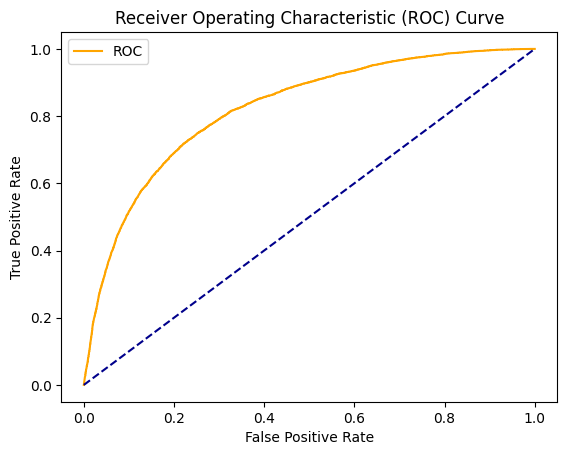

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


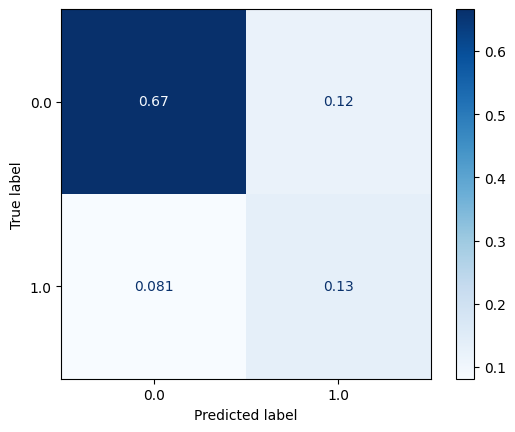

In [60]:
from sklearn.naive_bayes import GaussianNB   

params_gnb = {}   

model_gnb = GaussianNB(**params_gnb)   

model_gnb, accuracy_gnb, roc_auc_gnb, coh_kap_gnb, tt_gnb = run_model(model_gnb, X_train, y_train, X_test, y_test)


### 4) Random Forest

Accuracy = 0.8526847321540585
ROC Area under Curve = 0.7106768793753954
Cohen's Kappa = 0.49054975301183557
Time taken = 19.903675079345703
              precision    recall  f1-score   support

         0.0    0.86742   0.95913   0.91097     25054
         1.0    0.75508   0.46223   0.57343      6830

    accuracy                        0.85268     31884
   macro avg    0.81125   0.71068   0.74220     31884
weighted avg    0.84335   0.85268   0.83866     31884



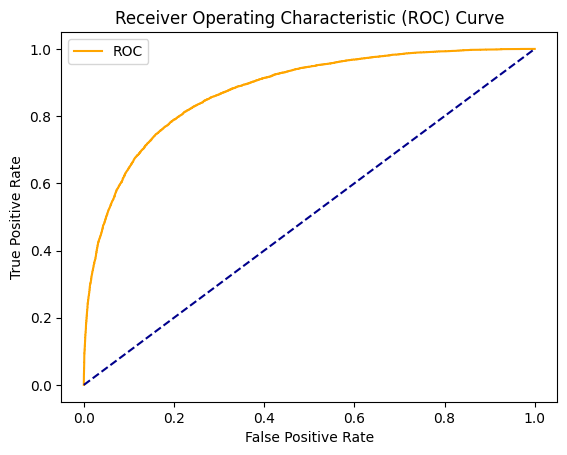

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


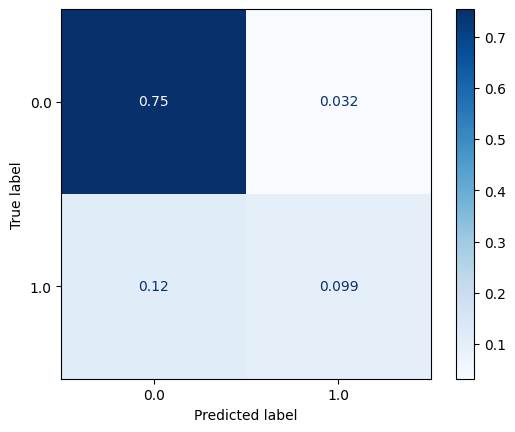

In [61]:
from sklearn.ensemble import RandomForestClassifier  

params_rf = {'max_depth': 16,  
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)  

model_rf, accuracy_rf, roc_auc_rf, coh_kap_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)


### 5) KNeighborsClassifier

Accuracy = 0.834368335215155
ROC Area under Curve = 0.6971050700326241
Cohen's Kappa = 0.4448291564651987
Time taken = 78.92744207382202
              precision    recall  f1-score   support

         0.0    0.86359   0.93726   0.89892     25054
         1.0    0.66503   0.45695   0.54170      6830

    accuracy                        0.83437     31884
   macro avg    0.76431   0.69711   0.72031     31884
weighted avg    0.82106   0.83437   0.82240     31884



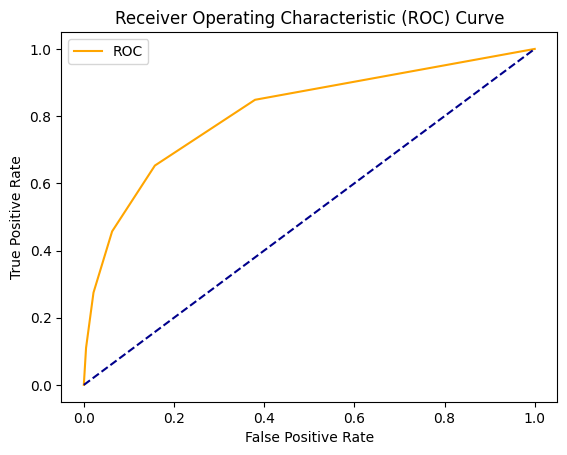

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


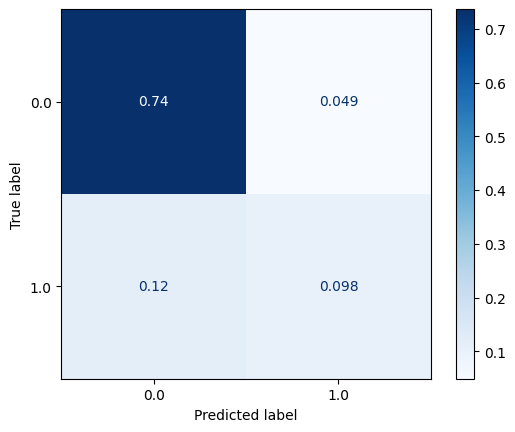

In [62]:
from sklearn.neighbors import KNeighborsClassifier  
params_knn = {'n_neighbors': 5,
              'weights': 'uniform'}

model_knn = KNeighborsClassifier(**params_knn)  
model_knn, accuracy_knn, roc_auc_knn, coh_kap_knn, tt_knn = run_model(model_knn, X_train, y_train, X_test, y_test)


### 6) Linear Discriminant Analysis

Accuracy = 0.8445928992598168
ROC Area under Curve = 0.712237444133848
Cohen's Kappa = 0.47903765322045655
Time taken = 0.6244101524353027
              precision    recall  f1-score   support

         0.0    0.86956   0.94380   0.90516     25054
         1.0    0.69985   0.48067   0.56992      6830

    accuracy                        0.84459     31884
   macro avg    0.78471   0.71224   0.73754     31884
weighted avg    0.83321   0.84459   0.83335     31884



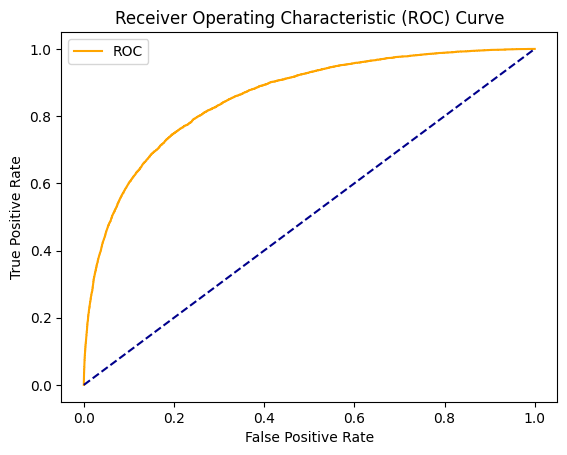

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


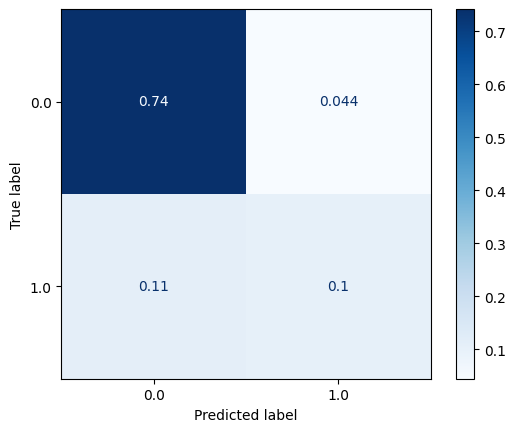

In [63]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

params_lda = {}

model_lda = LinearDiscriminantAnalysis(**params_lda)

model_lda, accuracy_lda, roc_auc_lda, coh_kap_lda, tt_lda = run_model(model_lda, X_train, y_train, X_test, y_test)

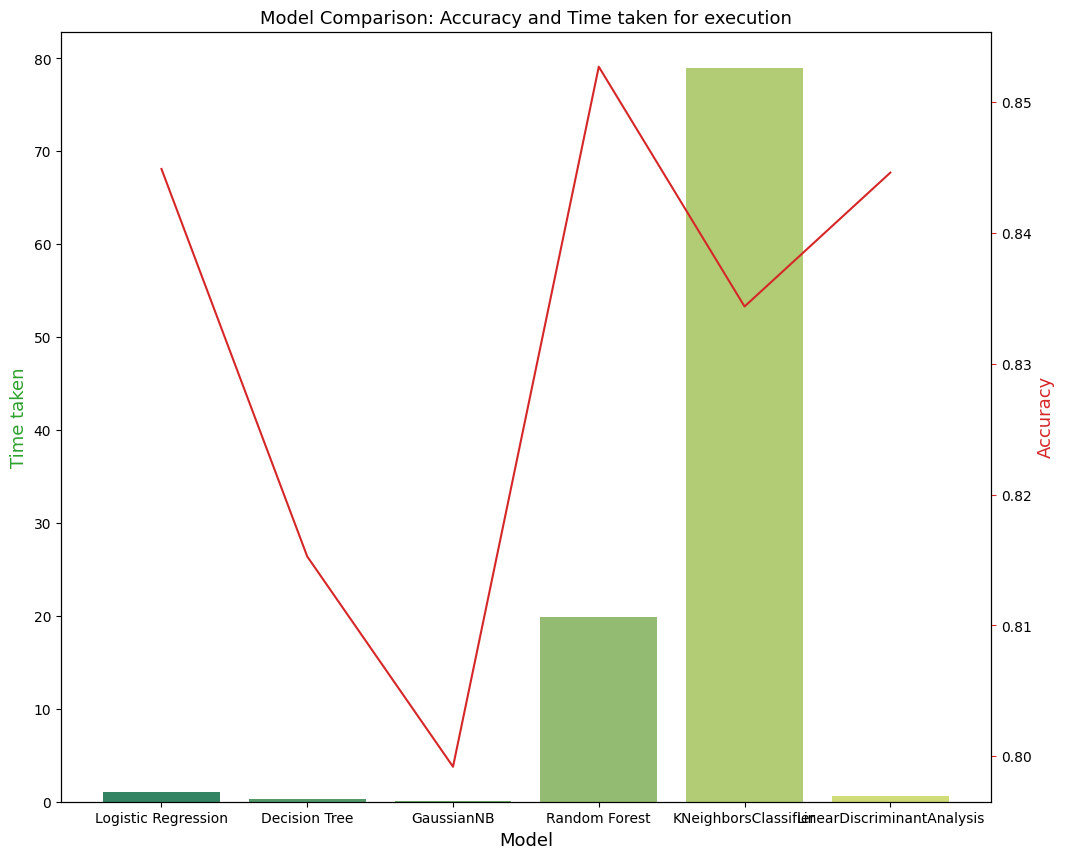

In [65]:
accuracy_scores = [accuracy_lr, accuracy_dt, accuracy_gnb, accuracy_rf, accuracy_knn, accuracy_lda]
roc_auc_scores = [roc_auc_lr, roc_auc_dt, roc_auc_gnb, roc_auc_rf, roc_auc_knn, roc_auc_lda]
coh_kap_scores = [coh_kap_lr, coh_kap_dt, coh_kap_gnb, coh_kap_rf, coh_kap_knn, coh_kap_lda]
tt = [tt_lr, tt_dt, tt_gnb, tt_rf, tt_knn, tt_lda]

model_data = {'Model': ['Logistic Regression','Decision Tree','GaussianNB','Random Forest','KNeighborsClassifier','LinearDiscriminantAnalysis'],
              'Accuracy': accuracy_scores,
              'ROC_AUC': roc_auc_scores,
              'Cohen_Kappa': coh_kap_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(12,10))
ax1.set_title('Model Comparison: Accuracy and Time taken for execution', fontsize=13)
color = 'tab:green'
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time taken', fontsize=13, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='summer')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Accuracy', fontsize=13, color=color)
ax2 = sns.lineplot(x='Model', y='Accuracy', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)


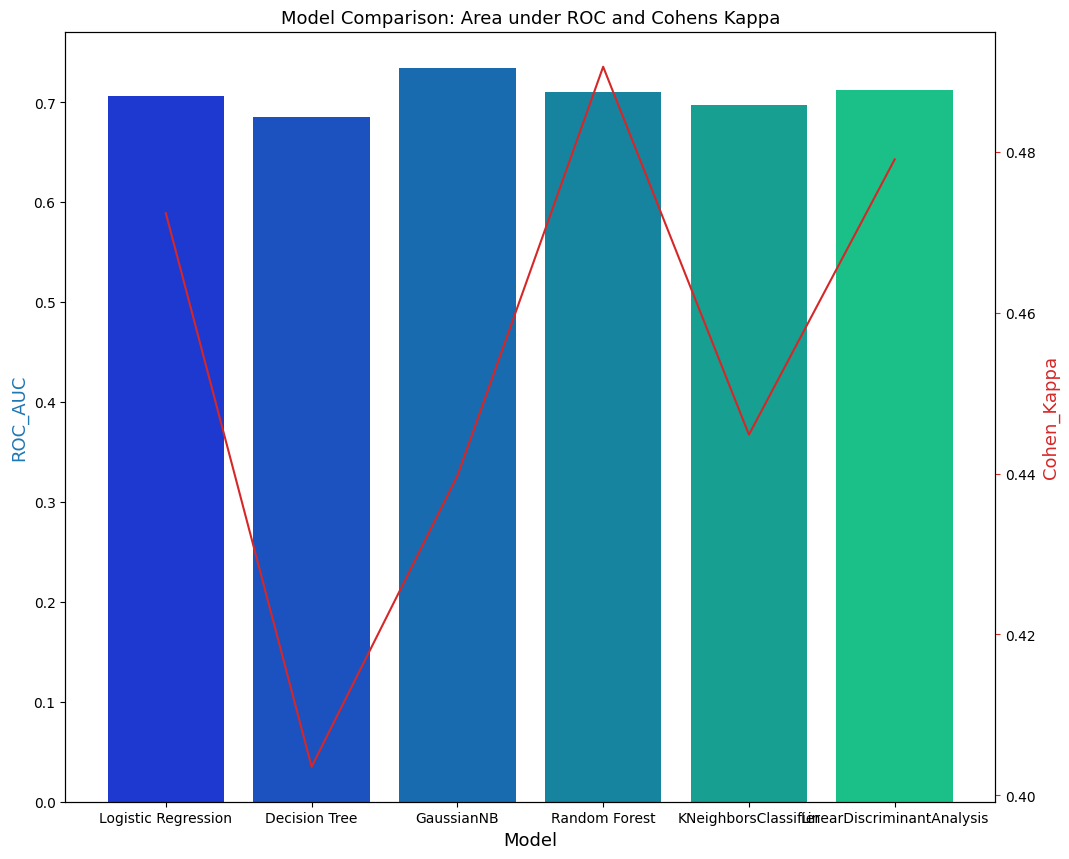

In [67]:
fig, ax3 = plt.subplots(figsize=(12,10))

ax3.set_title('Model Comparison: Area under ROC and Cohens Kappa', fontsize=13)


ax3.set_xlabel('Model', fontsize=13)


color = 'tab:blue'
ax3.set_ylabel('ROC_AUC', fontsize=13, color=color)

ax4 = sns.barplot(x='Model', y='ROC_AUC', data=data, palette='winter')

ax3.tick_params(axis='y')


ax4 = ax3.twinx()


color = 'tab:red'
ax4.set_ylabel('Cohen_Kappa', fontsize=13, color=color)


ax4 = sns.lineplot(x='Model', y='Cohen_Kappa', data=data, sort=False, color=color)


ax4.tick_params(axis='y', color=color)


plt.show()

## IV) BUILDING THE BEST MODEL FOR PREDICTION

### 1) Analysis of two models: Logistic Regression and Random Forest

The following confusion matrices and classification reports will give us a brief overview of the 2 most effective models 


### CONFUSION MATRIX

In this dataset, we concentrate on the number of True Positive and True Nagative as we want correct predictions

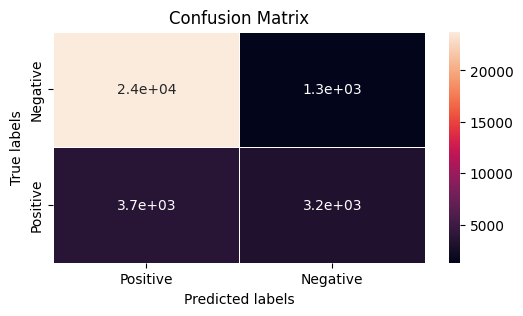

In [68]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

#Logistic Regression
lr=LogisticRegression()


lr.fit(X_train,y_train)


predictions1=lr.predict(X_test)


cm1=confusion_matrix(y_test,predictions1)

fig, ax= plt.subplots(figsize=(6,3))
sns.heatmap(cm1, annot=True, ax = ax,linewidths=.5); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Positive', 'Negative']); ax.yaxis.set_ticklabels(['Negative', 'Positive']);

In [69]:
tn, fp, fn, tp = confusion_matrix(y_test,predictions1).ravel()
print('True Positive:', tp,';',
      'False Positive:', fp,';',
      'True Negative:', tn,';',
      'False Negative', fn)

True Positive: 3167 ; False Positive: 1282 ; True Negative: 23772 ; False Negative 3663


The code is generating a confusion matrix and heatmap for the Logistic Regression model and printing the values of true positive, false positive, true negative, and false negative. These metrics are useful in evaluating the performance of the model.

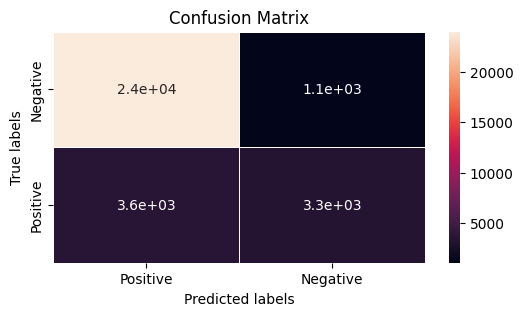

In [70]:
#Random Forest

rf=RandomForestClassifier()

rf.fit(X_train,y_train)

predictions2=rf.predict(X_test)

cm2=confusion_matrix(y_test,predictions2)

fig, ax= plt.subplots(figsize=(6,3))
sns.heatmap(cm2, annot=True, ax = ax,linewidths=.5); #annot=True to annotate cells

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Positive', 'Negative']); ax.yaxis.set_ticklabels(['Negative', 'Positive']);

The code is generating a confusion matrix and heatmap for the Random Forest model and printing the values of true positive, false positive, true negative, and false negative. These metrics are useful in evaluating the performance of the model.

In [71]:
tn, fp, fn, tp = confusion_matrix(y_test,predictions2).ravel()
print('True Positive:', tp,';',
      'False Positive:', fp,';',
      'True Negative:', tn,';',
      'False Negative', fn)

True Positive: 3268 ; False Positive: 1055 ; True Negative: 23999 ; False Negative 3562


### CLASSIFICATION REPORT

In [72]:
from sklearn.metrics import confusion_matrix

#Logistic Regression
print(classification_report(y_test,predictions1))

              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     25054
         1.0       0.71      0.46      0.56      6830

    accuracy                           0.84     31884
   macro avg       0.79      0.71      0.73     31884
weighted avg       0.83      0.84      0.83     31884



In [73]:
#Random Forest
print(classification_report(y_test,predictions2))

              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91     25054
         1.0       0.76      0.48      0.59      6830

    accuracy                           0.86     31884
   macro avg       0.81      0.72      0.75     31884
weighted avg       0.85      0.86      0.84     31884



## 2) FINDING THE BEST MODEL BY GRIDSEARCH

### A- Random Forest

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(50, 150),
    'max_depth': randint(5, 20),
    'min_samples_split': randint(2, 8),
    'min_samples_leaf': randint(1, 3),
}

model_rf = RandomForestClassifier(random_state=42)

rand_search = RandomizedSearchCV(model_rf, param_distributions=param_dist, cv=5, n_iter=50, n_jobs=-1, scoring='accuracy')
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7faae6eb9c10>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7faaf02a3610>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7faaf028af50>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7faaf028ab90>},
                   scoring='accuracy')

The parameter above is the best parameter for RandomForest model, we will use it the build the model

In [75]:
print("Best score:", rand_search.best_score_)
print("Best parameters:", rand_search.best_params_)


Best score: 0.8540437924308868
Best parameters: {'max_depth': 17, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 139}


#### B-Logistic Regression

a) Penalty testing - advoid overfitting

In [76]:
#RIDGE REGRESSION (L2 PENALTY)

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge=Ridge()
parameters= {'alpha':[2,4,6,8,10]}
ridge_reg=GridSearchCV(ridge, parameters,scoring='neg_mean_squared_error',cv=10)
ridge_reg.fit(X_train,y_train)
print("The best parameter is:",ridge_reg.best_params_)
print("The best score for this penalty is",ridge_reg.best_score_)

The best parameter is: {'alpha': 10}
The best score for this penalty is -0.11777986012683324


In [77]:
#LASSO REGRESSION (L1 PENALTY)

from sklearn.linear_model import Lasso

parameters= {'alpha':[2,4,6,8,10]}

lasso=Lasso()
lasso_reg=GridSearchCV(lasso, param_grid=parameters, scoring='neg_mean_squared_error', cv=10)
lasso_reg.fit(X_train,y_train)
print("The best parameter is:",lasso_reg.best_params_)
print('The best score for this penalty is: ',lasso_reg.best_score_)

The best parameter is: {'alpha': 2}
The best score for this penalty is:  -0.16868041982646442


The above testing points out that the L2 penalty with alpha= 10 would be more effective for our model (-0.11<-0.16)

**b) Best parameter for Logistic Regression**

In [78]:
param_grid2 = {
    'penalty':['l2'],
    'C':[1.0,10.0,50.0],
    'solver':['newton-cg', 'lbfgs', 'liblinear']
}

model_lr= LogisticRegression()

grid_search2 = GridSearchCV(
    model_lr, param_grid2, cv=10, scoring='accuracy')
grid_search2.fit(X_train, y_train)
print("The best score for this model is",grid_search2.best_score_)

The best score for this model is 0.8434114855507927


Since 2 models: Random Forest and Logistic Regression with optimized parameter have the same best accuracy score, we can build either one of them for our prediction

## 3) APPLY THE BEST PARAMETERS TO THE MODEL AND TRAIN IT

We choose Logistic Regression with L2 penalty and compatable parameter computed above

In [79]:
lr = grid_search2.best_estimator_

In [80]:
# Use the whole dataset to train the model
X = np.append(X_train, X_test, axis=0)
Y = np.append(y_train, y_test, axis=0)

In [81]:
# Train the model
lr.fit(X, Y)

LogisticRegression(C=50.0, solver='newton-cg')

## 4) MODIFY THE THRESHOLD

In [82]:
def optimize_threshold(model):
    bestthresh = []
    for i in range(1,101):
        threshold = i/100
        pred = np.where(model.predict_proba(X_test)[:,1] > threshold, 1, 0)
        tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
        recall = tp / (tp + fn)
        precision = tp / (tp + fp)
        f1 = (2*recall*precision)/(recall+precision)
        if recall>=0.9 and f1>=0.7:
            bestthresh.append(threshold)
    return bestthresh

This function will return a list of best thresholds for our model. We want to obtain only threshold with recall >=0.9 and f1 >=0.7, which can not only maximize the recall, minimize the False Negative problem, but also balance the interrelation between recall and precision

In [83]:
def optimize_threshold(model):
    # fit the model on training data
    model.fit(X_train, y_train)
    
    # predict probabilities on test data
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    # loop over different threshold values and calculate performance metrics
    best_threshold = 0
    best_f1 = 0
    for threshold in np.arange(0, 1.01, 0.01):
        y_pred = (y_pred_prob >= threshold).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        precision = tp / (tp + fp) if tp + fp > 0 else np.nan
        recall = tp / (tp + fn)
        f1 = 2 * precision * recall / (precision + recall) if precision + recall > 0 else np.nan
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold
            
    # return the best threshold and F1 score
    return best_threshold, best_f1

print('Logistic Regression')
optimize_threshold(lr)




Logistic Regression


(0.31, 0.6152028904947193)

In [84]:
print('Random Forest')
optimize_threshold(rf)

Random Forest


(0.33, 0.6458079371529187)

From the result, we can see optimized thresholds are 0.31 and 0.34 for Logistic Regression and Random Forest respectively. Then if the probability belongs to '1' class is larger than 0.31 for Linear Regression model and 0.34 for Random Forest model, then it is predicted to be raining in the next day.

# V) MAKE PREDICTIONS

In [85]:
# We create a new (fake) person information
new_data = pd.DataFrame([[-1.531666, 0.189757, -0.044575, -0.203581, -0.119472, 0.14871, 1.045228, 0.307739, 1.328766, 1.366458, 0.111308, -1.443652, 0.111308, -1.443652, -1.478015, -1.223012, 1.464068, 0.137693, -0.013506, 0.019135, -0.529795]])

# We scale those values like the others
new_data_scaled = scaler.fit_transform(new_data)

In [86]:
# We modify the threshold
prediction = rf.predict_proba(new_data_scaled)[:,1]
prediction

array([0.08])

In [87]:
# A value of "1" means that itis likely to rain
if prediction > 0.31:
    print("It is raining tomorrow")
else:
    print("It is not raining tomorrow")

#We use Linear Regression model in this case

It is not raining tomorrow


Prediction points out that with information:
<br><br>
(-1.531666, 0.189757, -0.044575, -0.203581, -0.119472, 0.14871, 1.045228, 0.307739, 1.328766, 1.366458, 0.111308, -1.443652, 0.111308, -1.443652, -1.478015, -1.223012, 1.464068, 0.137693, -0.013506, 0.019135, -0.529795)
<br><br>
 (Location| MinTemp| MaxTemp| Rainfall| Evaporation| Sunshine| WindGustDir| WindGustSpeed| WindDir9am| WindDir3pm| WindSpeed9am| WindSpeed3pm| Humidity9am| Humidity3pm| Pressure9am| Pressure3pm| Cloud9am| Cloud3pm| Temp9am| Temp3pm| RainToday) 
 <br><br>
 It is predicted 'not raining' towards 'RainTomorrow'

In [88]:
#Define a function using the logic above for quicker and more convenient prediction:
def prediction(data):
    data_scaled=scaler.transform(data)
    predict=lr.predict_proba(data_scaled)[:,1]
    if predict > 0.33:
        print("It is raining tomorrow")
    else:
        print("It is not raining tomorrow")


***Warning: The data passed in the function defined has to be a dataframe***


Let's check again with data of another day, using our function:

In [89]:
new_data1 = pd.DataFrame([[-1.531666, 0.189757, 1.013502, -0.275097, -0.119472, 0.14871, -1.085108, -0.759262, 0.664436, -1.277810, 0.335063, -1.453506, -1.108508, -1.443652, -0.868663, -0.982915, 0.149133, 0.137693, 0.529191, 1.040938, -0.529795]])

prediction(new_data1)

It is not raining tomorrow


Prediction points out that with information:
<br><br>
(-1.531666, 0.189757, 1.013502, -0.275097, -0.119472, 0.14871, -1.085108, -0.759262, 0.664436, -1.277810, 0.335063, -1.453506, -1.108508, -1.443652, -0.868663, -0.982915, 0.149133, 0.137693, 0.529191, 1.040938, -0.529795)

<br><br>
 (Location| MinTemp| MaxTemp| Rainfall| Evaporation| Sunshine| WindGustDir| WindGustSpeed| WindDir9am| WindDir3pm| WindSpeed9am| WindSpeed3pm| Humidity9am| Humidity3pm| Pressure9am| Pressure3pm| Cloud9am| Cloud3pm| Temp9am| Temp3pm| RainToday) 
 <br><br>
 It is predicted 'not raining' towards 'RainTomorrow'

# VI) CONCLUSION

With Logistic Regression algorithm with Ridge Penalty and Parameters optimization, we find the score of 84.3% for the best parameter of the model. We believe that there still are other and further methods that can be used to optimize the solution but until this time, with our abilities in Data Science until now, this is the best that we can do. As training a machine to learn from historical data and predict future information is a long test/fail/improve process, there will always be improvements that we can make.

# RESOURCES

Below is the resources that we've been using during the project.

[1] Title: Weather Dataset (Rattle Package)
URL: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package
Publisher: Kaggle

[2] Title: Practical Guide to 6 Classification Algorithms
URL: https://www.kaggle.com/code/faressayah/practical-guide-to-6-classification-algorithms#%F0%9F%94%8D-Exploratory-Data-Analysis-(EDA)
Publisher: Kaggle
Author: Faress Ayah

[3] https://pandas.pydata.org

[4] https://scikit-learn.org/stable/

As well as many discussion forums, topics,... that give us a helping hand when encoutering many difficulties during this study.

# ***THANK YOU FOR PAYING ATTENTION***